# Carga de datos e inicialización de matrices

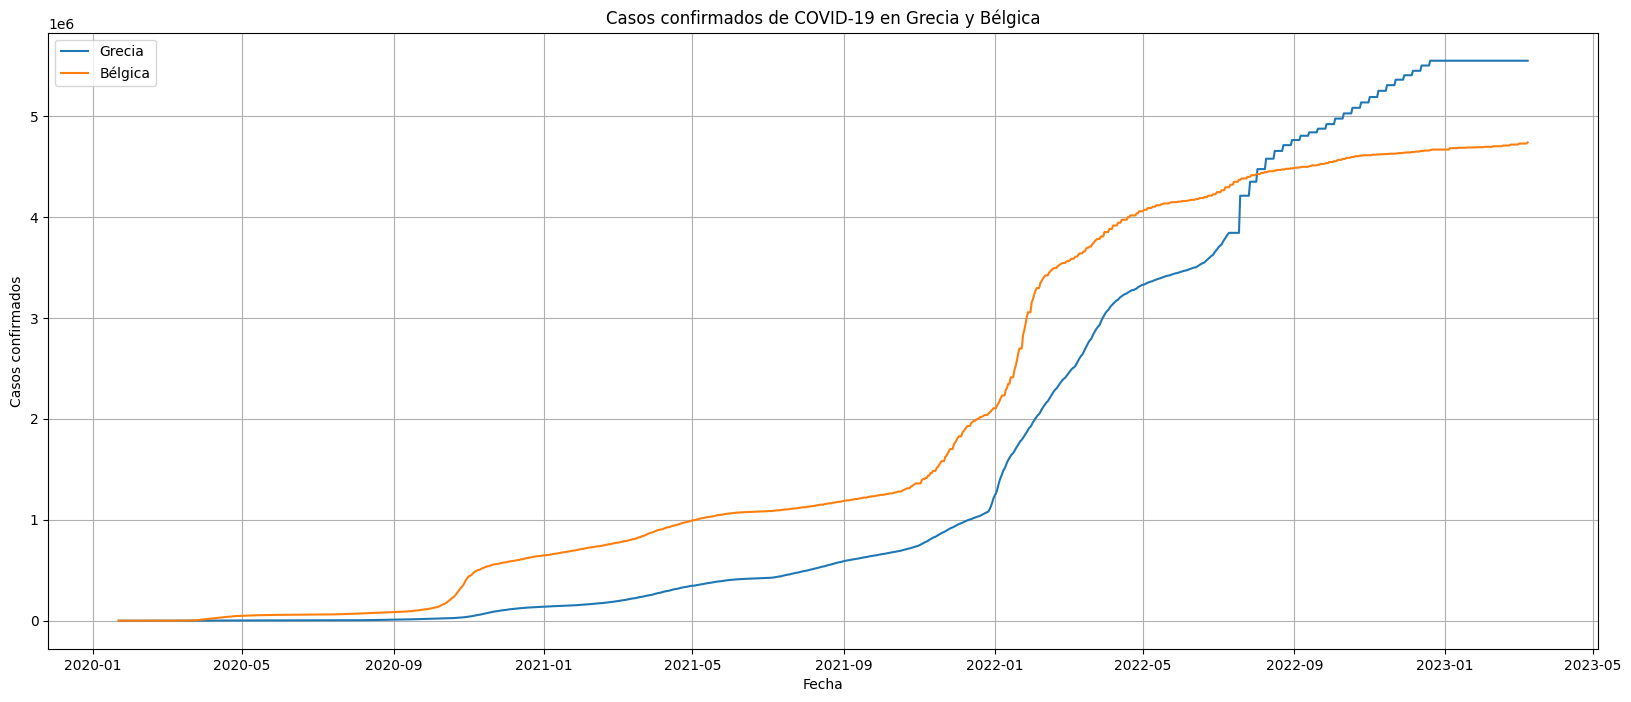

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import skew
import matplotlib.dates as mdates
import datetime
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
#Carga de datos del .CSV y preprocesado 
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
data = pd.read_csv(url)

# Extraer datos de Grecia y Belgica
Greece_data = data.loc[data["Country/Region"] == "Greece"].iloc[:, 4:].T
Belgium_data = data[data['Country/Region'] == 'Belgium'].iloc[:, 4:].T

# Obtener las fechas y convertirlas en índices de DataFrames
dates = pd.to_datetime(data.columns[4:])
Greece_data.index = dates
Belgium_data.index = dates

# Ponemos en el grafico los datos normales
plt.figure(figsize=(20, 8))
plt.plot(Greece_data, label="Grecia")
plt.plot(Belgium_data, label="Bélgica")
plt.xlabel("Fecha")
plt.ylabel("Casos confirmados")
plt.title("Casos confirmados de COVID-19 en Grecia y Bélgica")
plt.legend()
plt.grid(True)
plt.show()

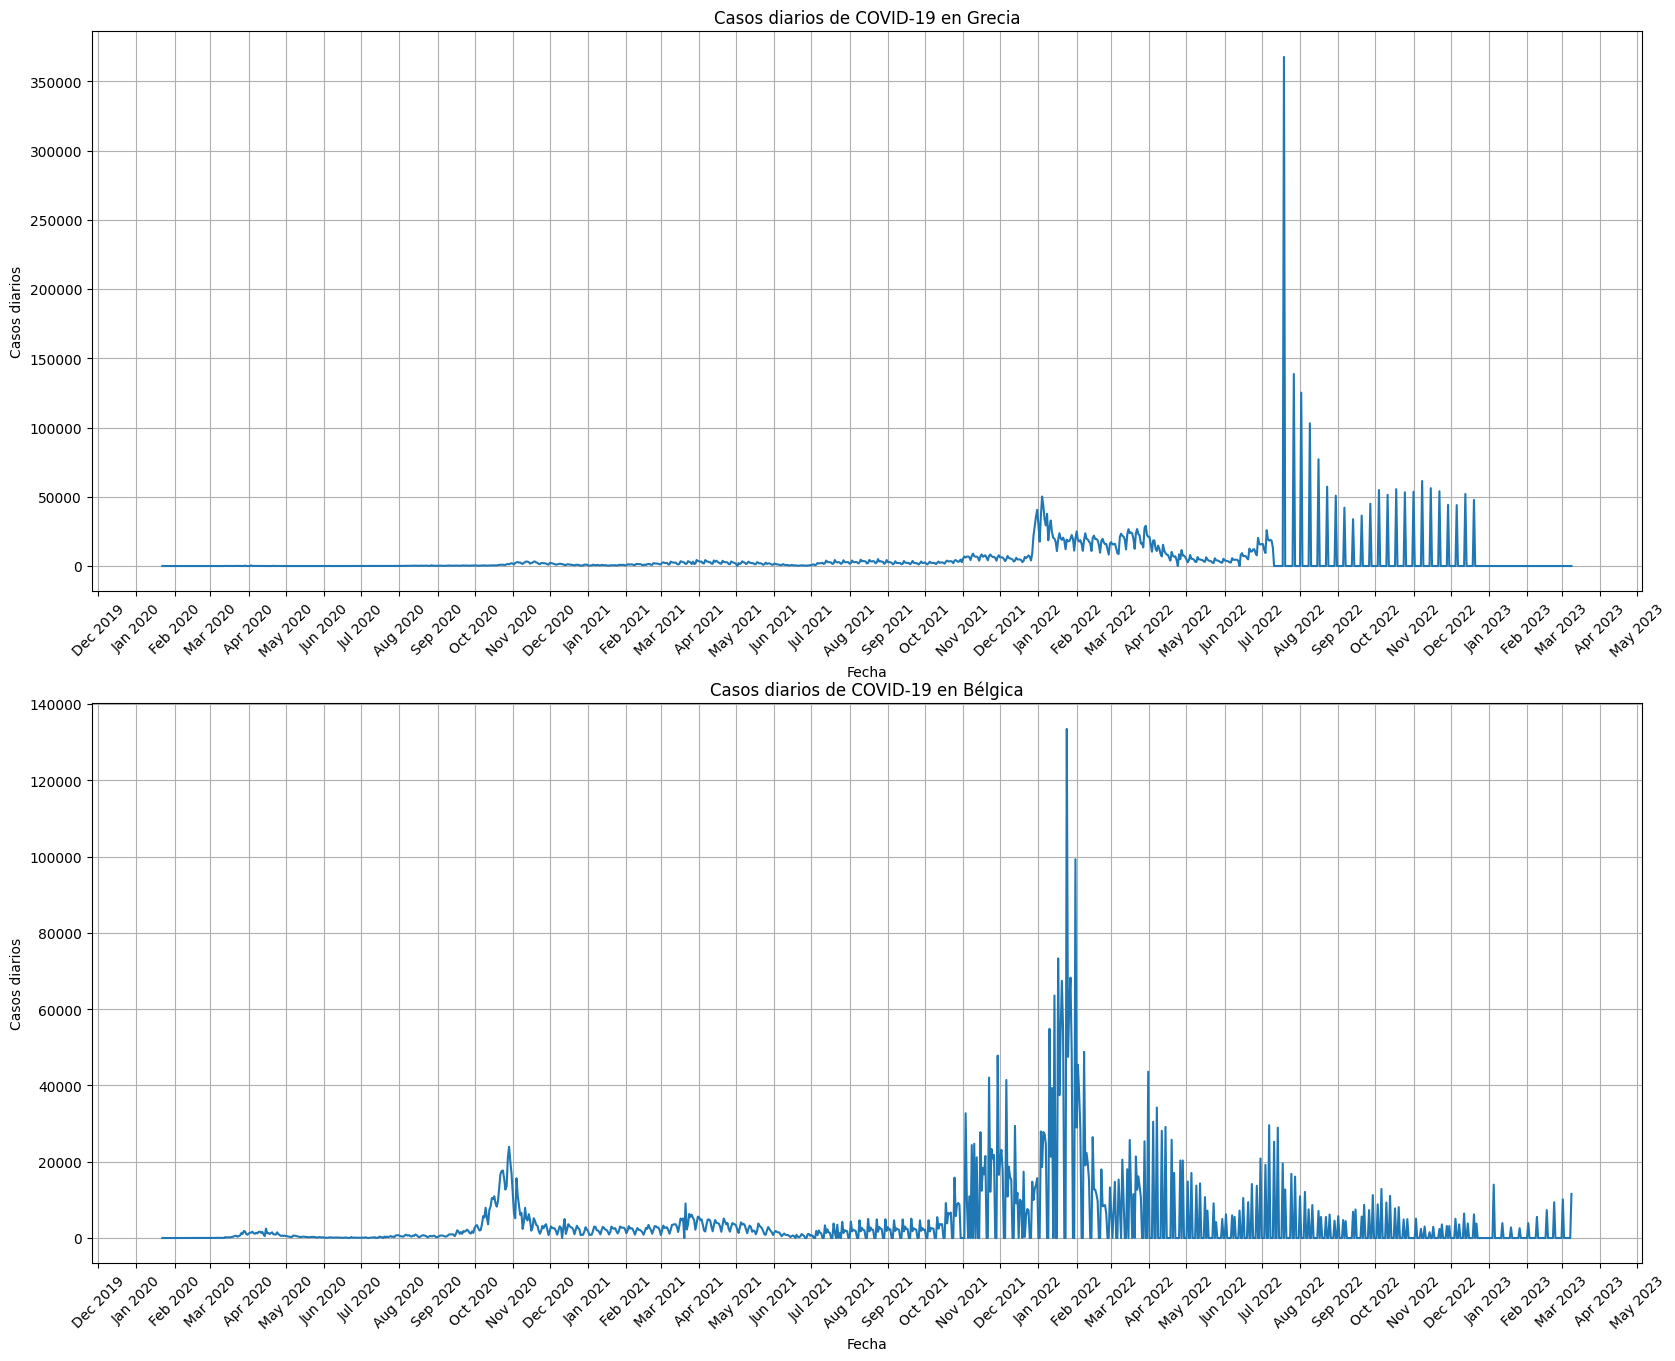

In [2]:
# Función para preparar los datos y crear el gráfico
def prepare_and_plot(data, country):
    # Filtrar los datos del país
    country_data = data[data["Country/Region"] == country]
    # Eliminar columnas innecesarias y transponer los datos
    country_data = country_data.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1).T
    # Calcular los casos diarios
    country_data["Daily Cases"] = country_data.diff().fillna(country_data.iloc[0])
    # Convertir el índice a objetos de fecha
    country_data.index = pd.to_datetime(country_data.index)
    return country_data

# Preparar los datos de Grecia y Bélgica
greece_data_Diary = prepare_and_plot(data, "Greece")
belgium_data_Diary = prepare_and_plot(data, "Belgium")

# Crear las gráficas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 16))

# Gráfica para Grecia
ax1.plot(greece_data_Diary.index, greece_data_Diary["Daily Cases"])
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos diarios")
ax1.set_title("Casos diarios de COVID-19 en Grecia")
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax1.grid(True)

# Gráfica para Bélgica
ax2.plot(belgium_data_Diary.index, belgium_data_Diary["Daily Cases"])
ax2.set_xlabel("Fecha")
ax2.set_ylabel("Casos diarios")
ax2.set_title("Casos diarios de COVID-19 en Bélgica")
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax2.grid(True)

# Ajustar la rotación de las etiquetas del eje X en ambos subplots
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.show()

# Ejercicios [80% de datos de entrenamiento y un 20% de test]

1.  **Realice un análisis estadístico previo sobre los conjuntos de entrenamiento y
test. Dicho análisis debe mostrar, entre otros aspectos que el alumno considere,el número de observaciones, la media, el rango, sesgo, etc. Adicionalmente el
alumno puede emplear alguna gráfica (por ejemplo un histograma) que ilustre
la naturaleza de los datos. Sobre dicho análisis deberá argumentar si el conjunto de entrenamiento y test son similares y cuáles son las características más relevantes de los datos.**

Estadísticas de los conjuntos de entrenamiento y test:
   count         mean           std  min  25%     50%     75%       max  \
0  913.0  4180.857612   9072.187504  0.0  2.0   833.0  3237.0  103059.0   
1  229.0  7560.541485  28606.565452  0.0  3.0  1307.0  4761.0  367629.0   

  Dataset  
0   Train  
1    Test  

Sesgo del conjunto de entrenamiento: 4.200254231400659
Sesgo del conjunto de test: 9.644812534694037



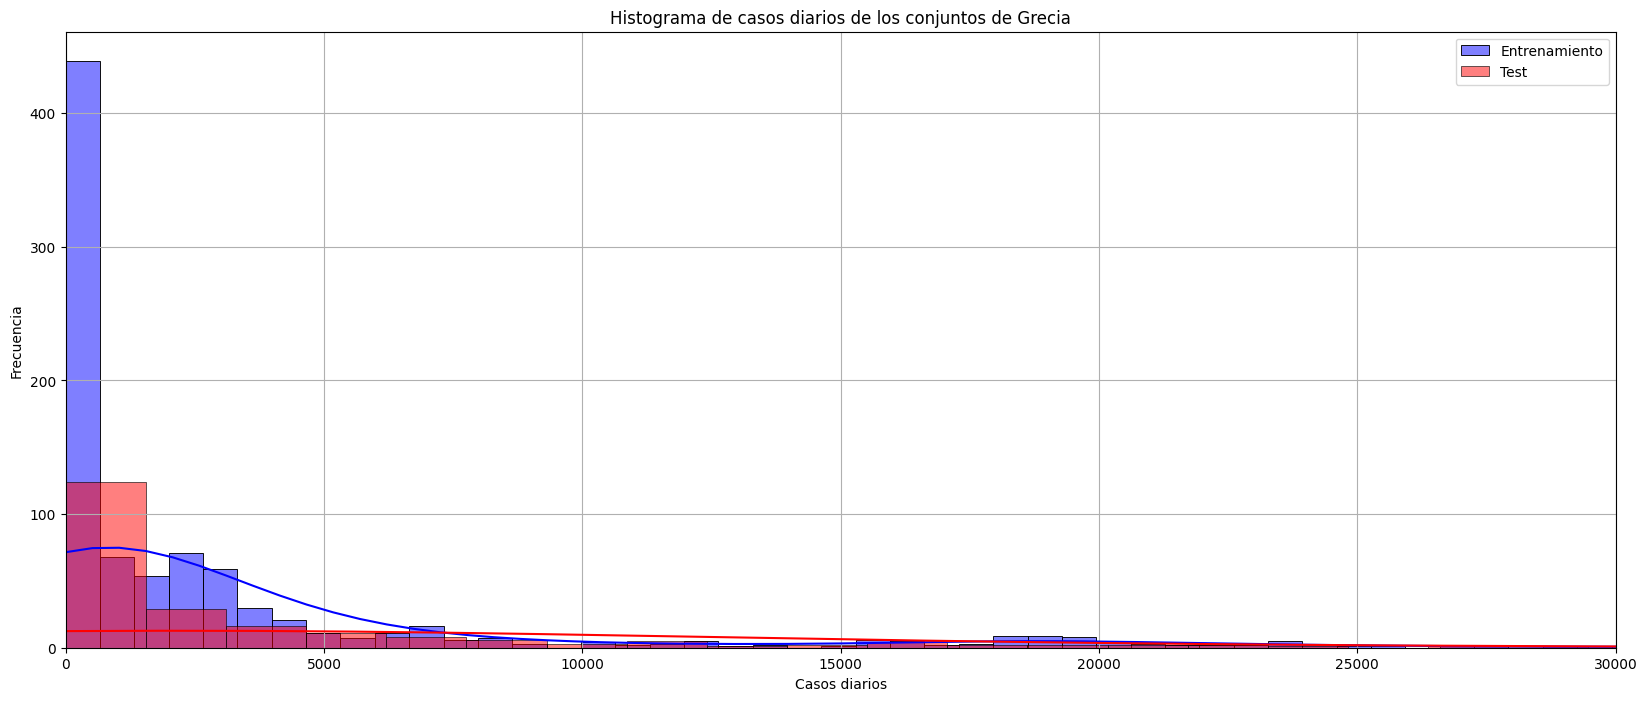

In [28]:
Greece_data = data.loc[data["Country/Region"] == "Greece"].iloc[:, 4:].T
daily_cases = Greece_data.diff().dropna()
# Dividir la muestra en entrenamiento y test (80% y 20%)
train_data, test_data = train_test_split(daily_cases, test_size=0.2, random_state=45)

# Análisis estadístico previo
train_stats = train_data.describe().T
train_stats["Dataset"] = "Train"
test_stats = test_data.describe().T
test_stats["Dataset"] = "Test"
stats = pd.concat([train_stats, test_stats], axis=0).reset_index(drop=True)

print("Estadísticas de los conjuntos de entrenamiento y test:")
print(stats)

# Calcular el sesgo
train_skew = skew(train_data)[0]
test_skew = skew(test_data)[0]
print(f"\nSesgo del conjunto de entrenamiento: {train_skew}")
print(f"Sesgo del conjunto de test: {test_skew}\n")

# Visualización de histogramas
plt.figure(figsize=(20, 8))
sns.histplot(train_data.iloc[:, 0], kde=True, color="blue", label="Entrenamiento")
sns.histplot(test_data.iloc[:, 0], kde=True, color="red", label="Test", alpha=0.5)
plt.xlabel("Casos diarios")
plt.ylabel("Frecuencia")
plt.title("Histograma de casos diarios de los conjuntos de Grecia")
plt.legend()
plt.xlim([0,30000])
plt.grid(True)
plt.show()



> **Número de observaciones:** El conjunto de entrenamiento tiene 913 observaciones, mientras que el conjunto de test tiene 229. La división entre los conjuntos de entrenamiento y test es aproximadamente 80/20, lo cual es bastante común en la práctica y permite una evaluación adecuada del rendimiento del modelo.

>**Media:** La media del conjunto de entrenamiento es de aproximadamente 4180,86, mientras que la media del conjunto de test es de aproximadamente 7560,54. Esto indica que el conjunto de test tiene un promedio de casos diarios más alto en comparación con el conjunto de entrenamiento.

> **Desviación estándar:** La desviación estándar del conjunto de entrenamiento es de aproximadamente 9072,19, y la del conjunto de test es de aproximadamente 28606,57. Esto sugiere que hay una mayor variabilidad en el número de casos diarios en el conjunto de test en comparación con el conjunto de entrenamiento.

> **Sesgo:** El sesgo del conjunto de entrenamiento es de aproximadamente 4,20 y el sesgo del conjunto de test es de aproximadamente 9,64. Estos valores indican que la distribución de los casos diarios en ambos conjuntos es asimétrica y está sesgada hacia la derecha, lo que sugiere que hay una mayor probabilidad de observar valores más altos en el conjunto de test que en el conjunto de entrenamiento. La diferencia en el sesgo también puede afectar la capacidad del modelo para generalizar con precisión a los datos de test.













2.  **Cree una red alimentada hacia adelante con UNA sola capa oculta empleando,
por defecto, la misma configuración que la práctica no entregable explicada en
clase y con 5, 10, 15 y 20 neuronas intermedias. Para cada uno de estos modelos
explique si hay sesgo, varianza, sobreajuste…y haga una valoración de dichos
resultados.**

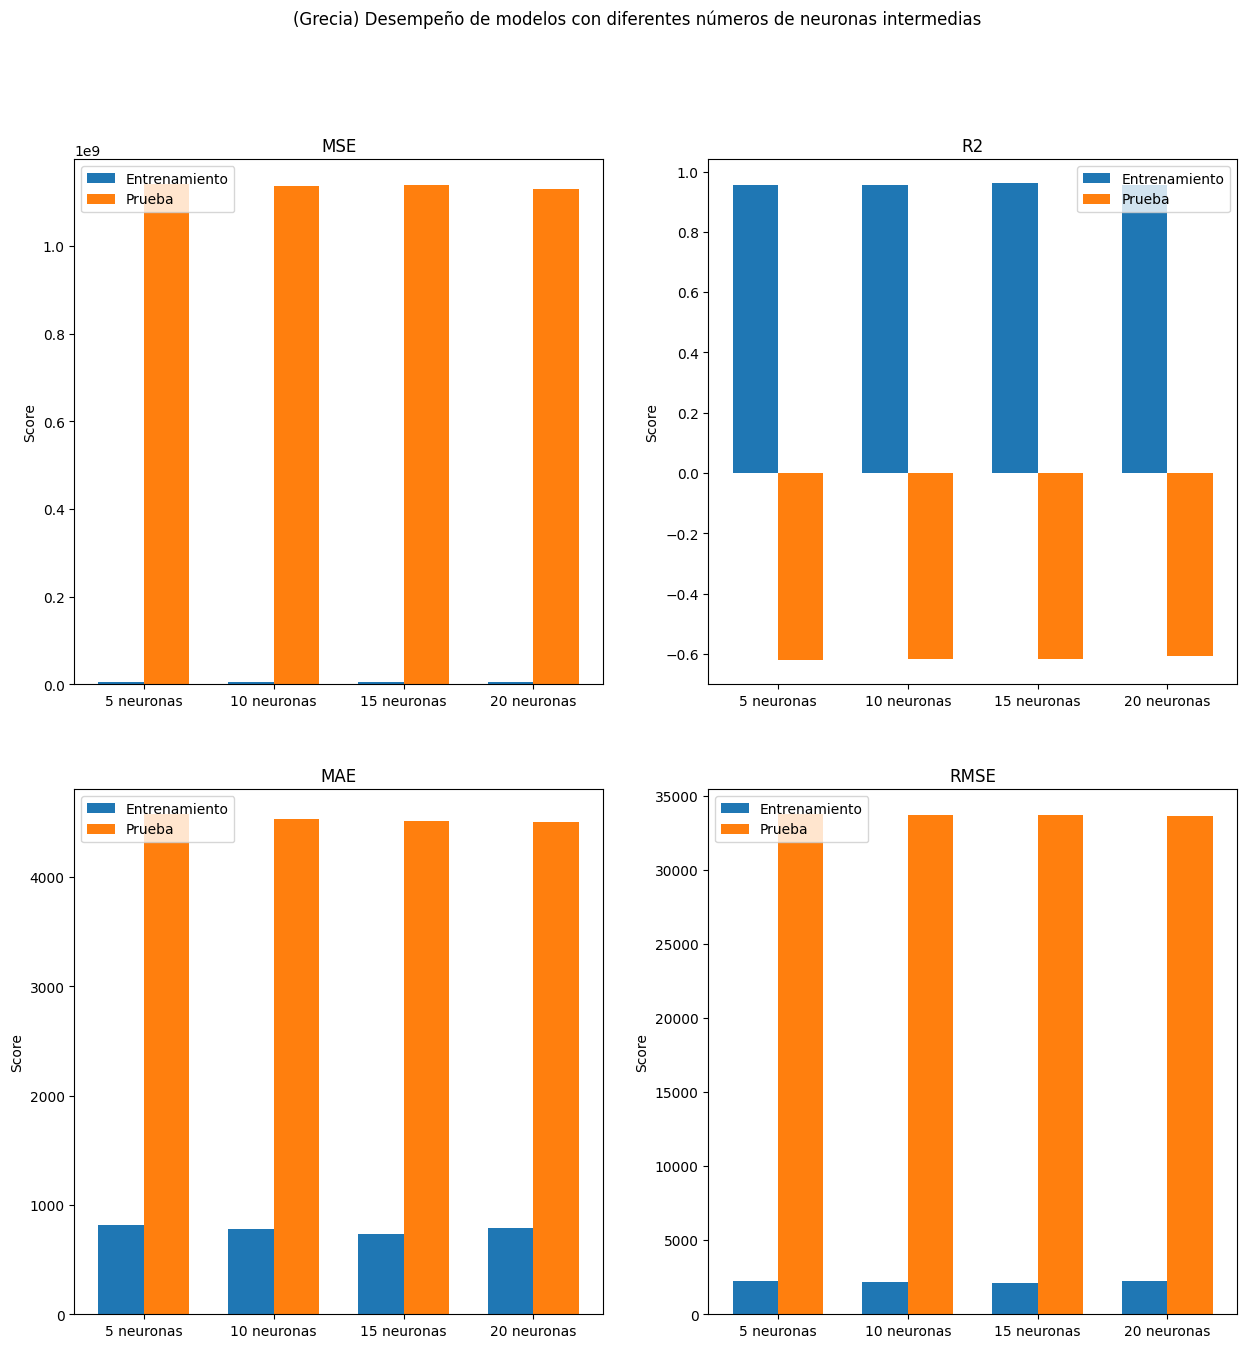

In [18]:
def create_dataset(data, window_size):
    X, y = [], []
    data_values = data.values.flatten()
    for i in range(len(data_values) - window_size):
        X.append(data_values[i:(i + window_size)])
        y.append(data_values[i + window_size])
    return np.array(X), np.array(y)

def train_and_evaluate_models(hidden_layer_sizes, X_train, y_train, X_test, y_test):
    models = []
    mse_train_values = []
    mse_test_values = []
    r2_train_values = []
    r2_test_values = []
    mae_train_values = []
    mae_test_values = []
    rmse_train_values = []
    rmse_test_values = []

    for size in hidden_layer_sizes:
        clf_ann = MLPRegressor(solver="adam", max_iter=9999, hidden_layer_sizes=(size),random_state=42)
        clf_ann.fit(X_train, y_train.ravel())
        models.append(clf_ann)
        y_train_pred = clf_ann.predict(X_train)
        y_test_pred = clf_ann.predict(X_test)
        mse_train = mean_squared_error(y_train, y_train_pred)
        mse_test = mean_squared_error(y_test, y_test_pred)
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
        rmse_train = np.sqrt(mse_train)
        rmse_test = np.sqrt(mse_test)
        mse_train_values.append(mse_train)
        mse_test_values.append(mse_test)
        r2_train_values.append(r2_train)
        r2_test_values.append(r2_test)
        mae_train_values.append(mae_train)
        mae_test_values.append(mae_test)
        rmse_train_values.append(rmse_train)
        rmse_test_values.append(rmse_test)

    return models, mse_train_values, mse_test_values, r2_train_values, r2_test_values, mae_train_values, mae_test_values, rmse_train_values, rmse_test_values

# Inicialización de variables
window_size = 8 #predicción a 8 días
X, y = create_dataset(daily_cases, window_size)
hidden_layer_sizes = [5, 10, 15, 20]
# Dividir la muestra en entrenamiento y test (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models, mse_train_values, mse_test_values, r2_train_values, r2_test_values, mae_train_values, mae_test_values, rmse_train_values, rmse_test_values = train_and_evaluate_models(hidden_layer_sizes, X_train, y_train, X_test, y_test)

# Crear listas de etiquetas para los modelos
model_labels = ['5 neuronas', '10 neuronas', '15 neuronas', '20 neuronas']

# Crear un gráfico de barras para cada métrica
width = 0.35
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Barra de MSE
axs[0, 0].bar(np.arange(len(model_labels)) - width/2, mse_train_values, width, label='Entrenamiento')
axs[0, 0].bar(np.arange(len(model_labels)) + width/2, mse_test_values, width, label='Prueba')
axs[0, 0].set_title('MSE')

# Barra de R2
axs[0, 1].bar(np.arange(len(model_labels)) - width/2, r2_train_values, width, label='Entrenamiento')
axs[0, 1].bar(np.arange(len(model_labels)) + width/2, r2_test_values, width, label='Prueba')
axs[0, 1].set_title('R2')

# Barra de MAE
axs[1, 0].bar(np.arange(len(model_labels)) - width/2, mae_train_values, width, label='Entrenamiento')
axs[1, 0].bar(np.arange(len(model_labels)) + width/2, mae_test_values, width, label='Prueba')
axs[1, 0].set_title('MAE')

# Barra de RMSE
axs[1, 1].bar(np.arange(len(model_labels)) - width/2, rmse_train_values, width, label='Entrenamiento')
axs[1, 1].bar(np.arange(len(model_labels)) + width/2, rmse_test_values, width, label='Prueba')
axs[1, 1].set_title('RMSE')

for i in range(2):
    for j in range(2):
        axs[i, j].set(ylabel='Score')
        axs[i, j].set_xticks(np.arange(len(model_labels)))
        axs[i, j].set_xticklabels(model_labels)
        axs[i, j].legend()

fig.suptitle('(Grecia) Desempeño de modelos con diferentes números de neuronas intermedias')
plt.show()

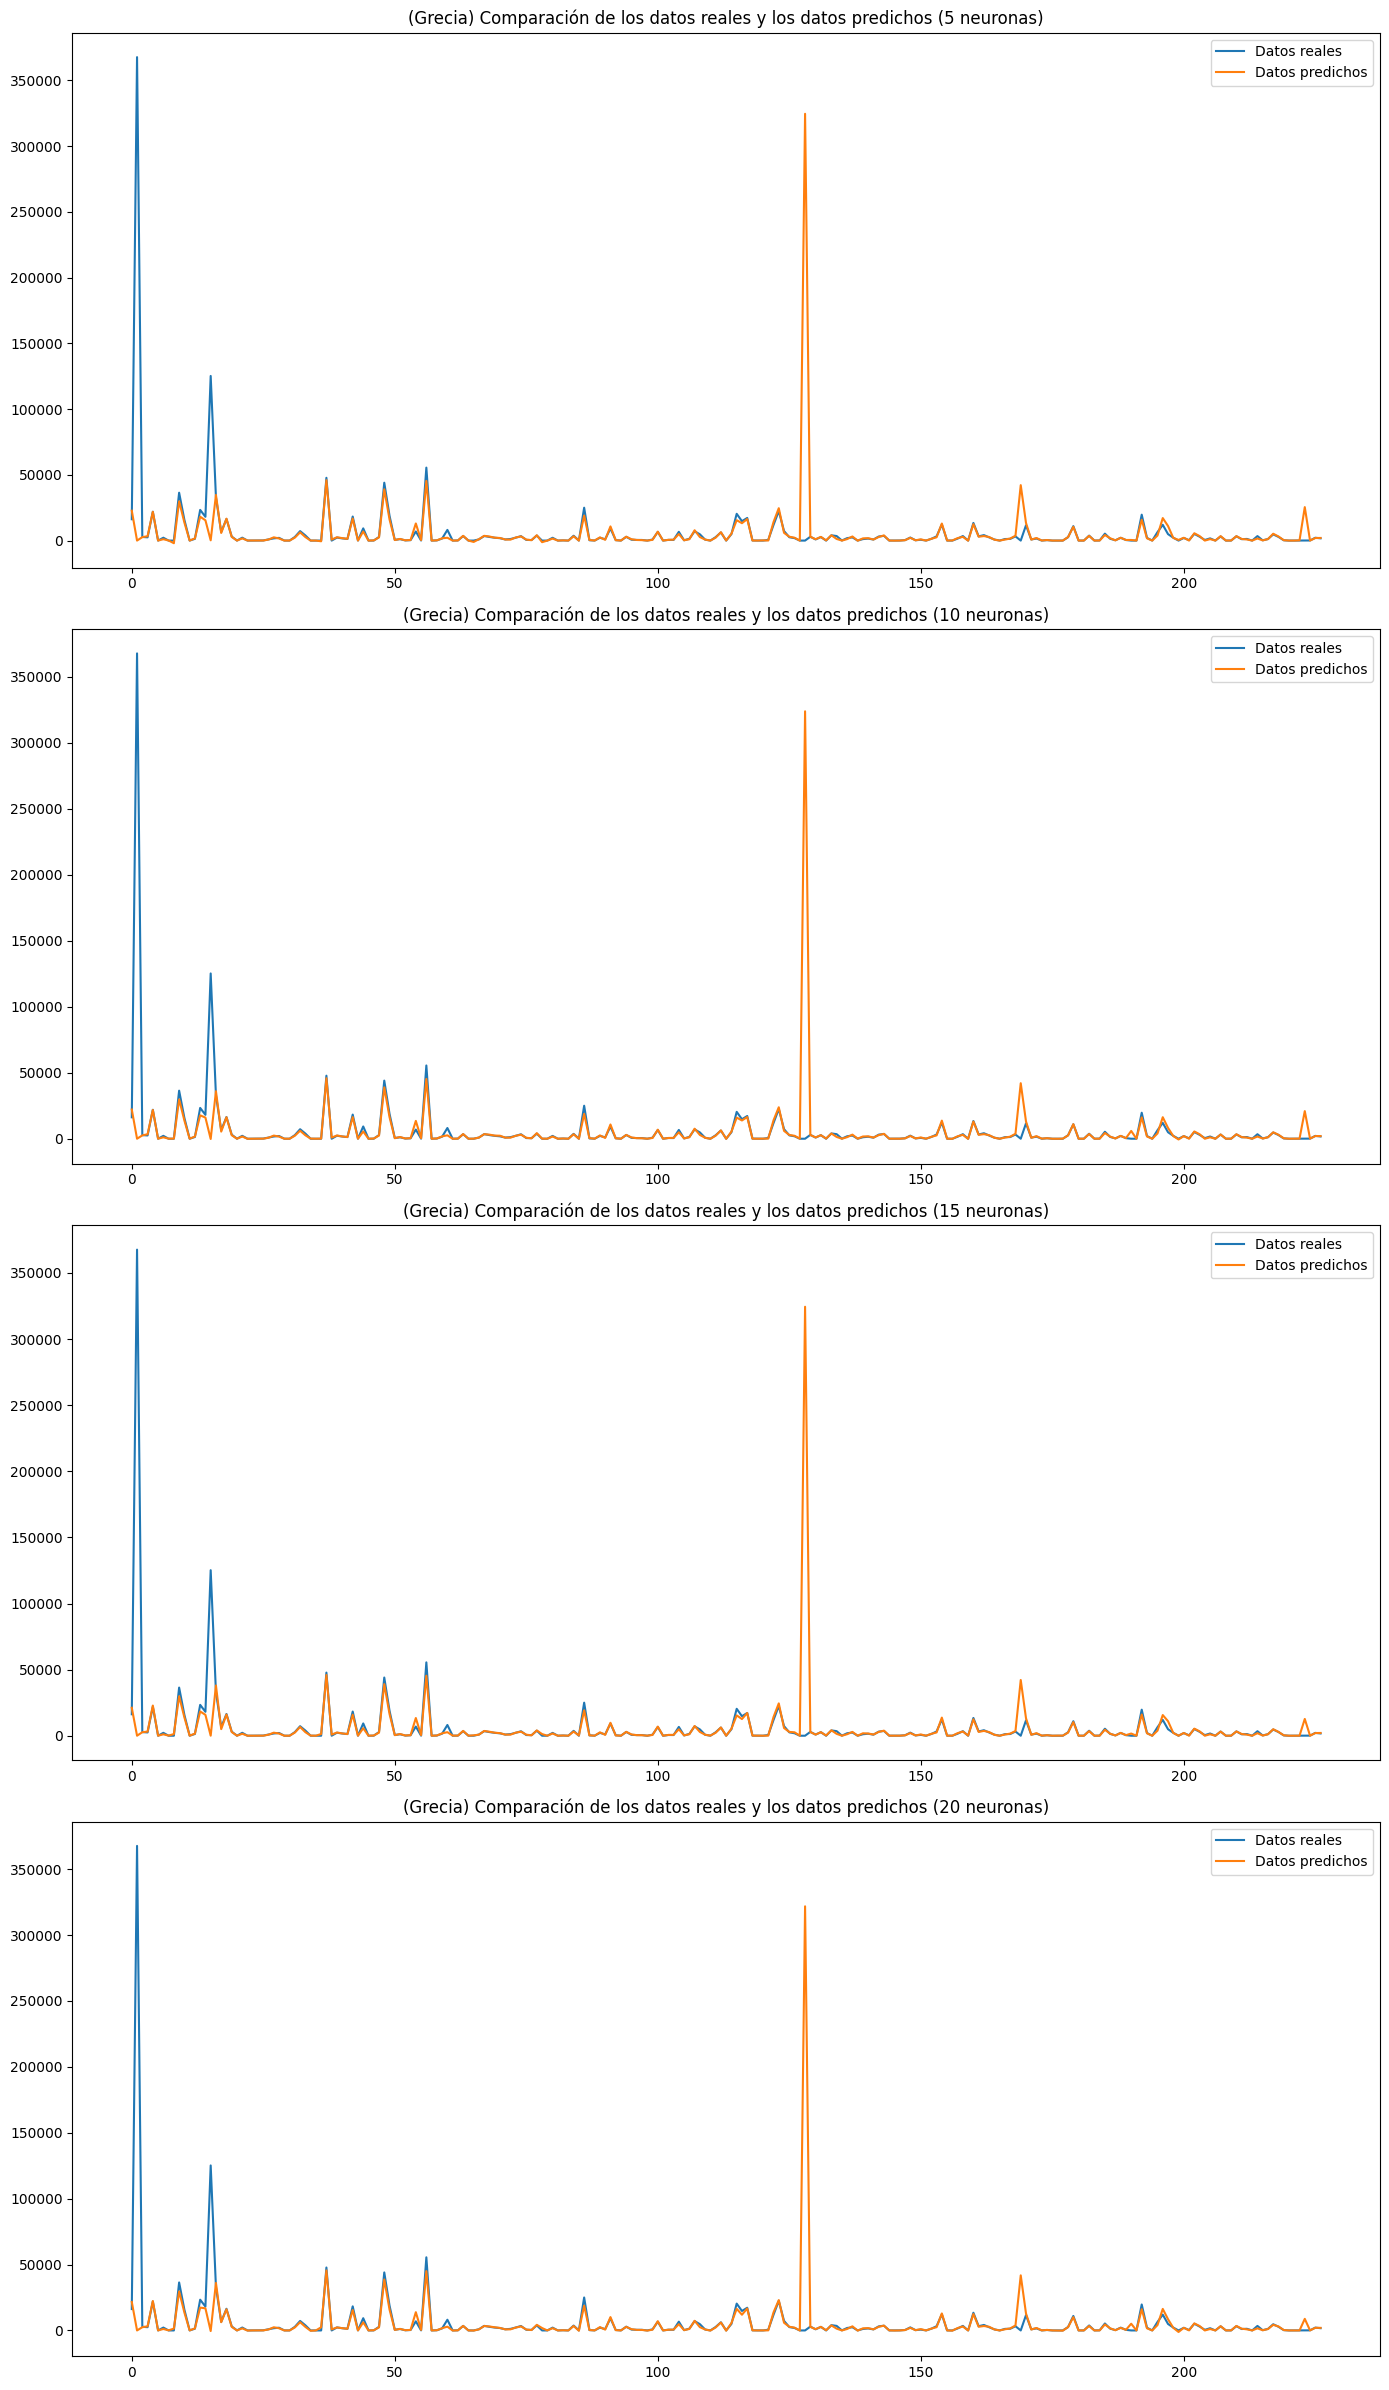

In [5]:
# Crear un gráfico de línea para los datos reales y predichos
fig, axs = plt.subplots(4, 1, figsize=(14, 24))
for i, model in enumerate(models):
    y_test_pred = model.predict(X_test)
    axs[i].plot(range(len(y_test)), y_test, label='Datos reales')
    axs[i].plot(range(len(y_test_pred)), y_test_pred, label='Datos predichos')
    axs[i].set_title('(Grecia) Comparación de los datos reales y los datos predichos (' + model_labels[i] + ')')
    axs[i].legend()
plt.tight_layout()
plt.show()

3. **Considere ahora una RNA con una o DOS capas. Determine, mediante algún
procedimiento, la estructura óptima (manteniendo un mínimo de 5 y un
máximo de 20 neuronas en cada capa) de la red explicando por qué considera
que dicha estructura es óptima. Puede investigar sobre distintos hiperparámetros
como el momento, la tasa de aprendizaje o el algoritmo de
optimización para determinar dicha estructura. Es importante que en esta
comparación, así como en la siguiente, argumente las medidas de error
consideradas.** 

In [6]:
# Crea el objeto MinMaxScaler
scaler = MinMaxScaler()  # Por defecto, MinMaxScaler escala los datos a [0, 1]
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  
# Definir los rangos de hiperparámetros y número de neuronas por capa
hidden_layer_sizes = [(i,) for i in range(5, 21)] + [(i, j) for i in range(5, 21) for j in range(5, 21)]
param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'momentum': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Configurar y ejecutar la búsqueda en cuadrícula aleatoria
mlp = MLPRegressor(max_iter=2000,random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # Utilizar MSE como medida de error
random_search = RandomizedSearchCV(mlp, param_grid, n_iter=50, scoring=mse_scorer, cv=5, n_jobs=-1, verbose=1,random_state=1)
random_search.fit(X_train_scaled, y_train.ravel())

# Mostrar los resultados
print(f"Mejores hiperparámetros encontrados: {random_search.best_params_}")
print(f"Mejor MSE de entrenamiento: {-random_search.best_score_}")

best_mlp = random_search.best_estimator_
y_test_pred = best_mlp.predict(X_test_scaled)
mse_mlp = mean_squared_error(y_test, y_test_pred)
r2_mlp = r2_score(y_test, y_test_pred)

print(f"Mejor modelo:")
print(f"  MSE de prueba: {mse_mlp:.5f}")
print(f"  R2 de prueba: {r2_mlp:.5f}\n")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros encontrados: {'solver': 'lbfgs', 'momentum': 0.1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (5, 13)}
Mejor MSE de entrenamiento: 48521621.41238025
Mejor modelo:
  MSE de prueba: 943078992.22645
  R2 de prueba: -0.33979



4. **Compare los resultados del modelo óptimo obtenido con alguno (uno SOLO) de
los algoritmos vistos en prácticas anteriores. ¿En qué medida el modelo de RNA
es superior o inferior?, motive la respuesta.**

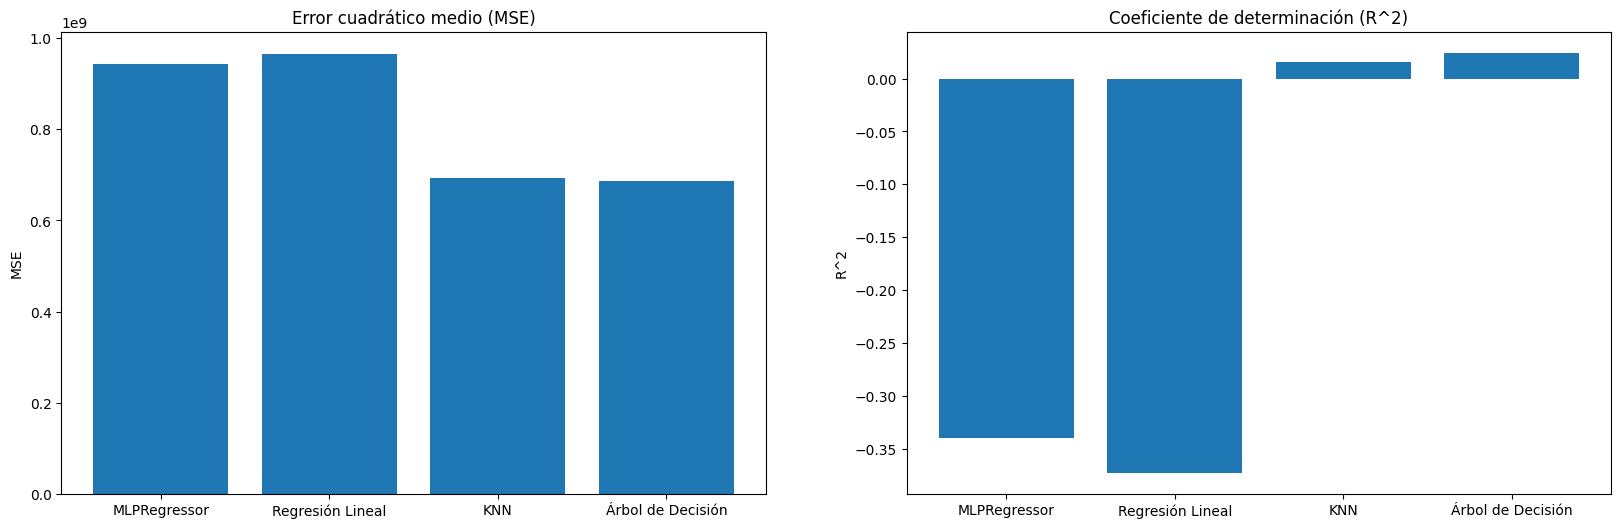

In [7]:
# Entrenar un modelo de Regresión Lineal
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train.ravel())

# Entrenar un modelo KNN
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train.ravel())

# Entrenar un Árbol de Decisión
decision_tree_regressor = DecisionTreeRegressor(random_state=45)
decision_tree_regressor.fit(X_train, y_train.ravel())

# Realizar predicciones en el conjunto de prueba para cada modelo
y_pred_lr = linear_regression.predict(X_test)
y_pred_knn = knn_regressor.predict(X_test)
y_pred_dt = decision_tree_regressor.predict(X_test)

# Calcular el error cuadrático medio (MSE) para cada modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calcular el coeficiente de determinación (R^2) para cada modelo
r2_lr = r2_score(y_test, y_pred_lr)
r2_knn = r2_score(y_test, y_pred_knn)
r2_dt = r2_score(y_test, y_pred_dt)

# Etiquetas de los modelos
model_labels = ['MLPRegressor', 'Regresión Lineal', 'KNN', 'Árbol de Decisión']

# Valores de MSE y R^2 para cada modelo
mse_values = [mse_mlp, mse_lr, mse_knn, mse_dt]
r2_values = [r2_mlp, r2_lr, r2_knn, r2_dt]

# Configurar la figura y los ejes
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# Graficar MSE
ax[0].bar(model_labels, mse_values)
ax[0].set_title('Error cuadrático medio (MSE)')
ax[0].set_ylabel('MSE')

# Graficar R^2
ax[1].bar(model_labels, r2_values)
ax[1].set_title('Coeficiente de determinación (R^2)')
ax[1].set_ylabel('R^2')

# Mostrar la gráfica
plt.show()

5. **Proponga críticas al modelo y posibles extensiones.**

> Decidimos quitar los datos del principio desde 22/1/2020 hasta 1/3/2020 dado que había mucha incertidumbre y eran un poco irreal los datos que se imputaban.

> Considerando los datos he decidido quitar el primer mes porque al principio los datos que se procesaban había mucha incongruencias, entonces hemos decidido quitarlos. Incremento de casos, hay que crearse 7 neuronas para los dias haciendo una matriz que sea si es lunes(100000). Es mejor trabajar con aumentos para que la red neuronal funcione mejor




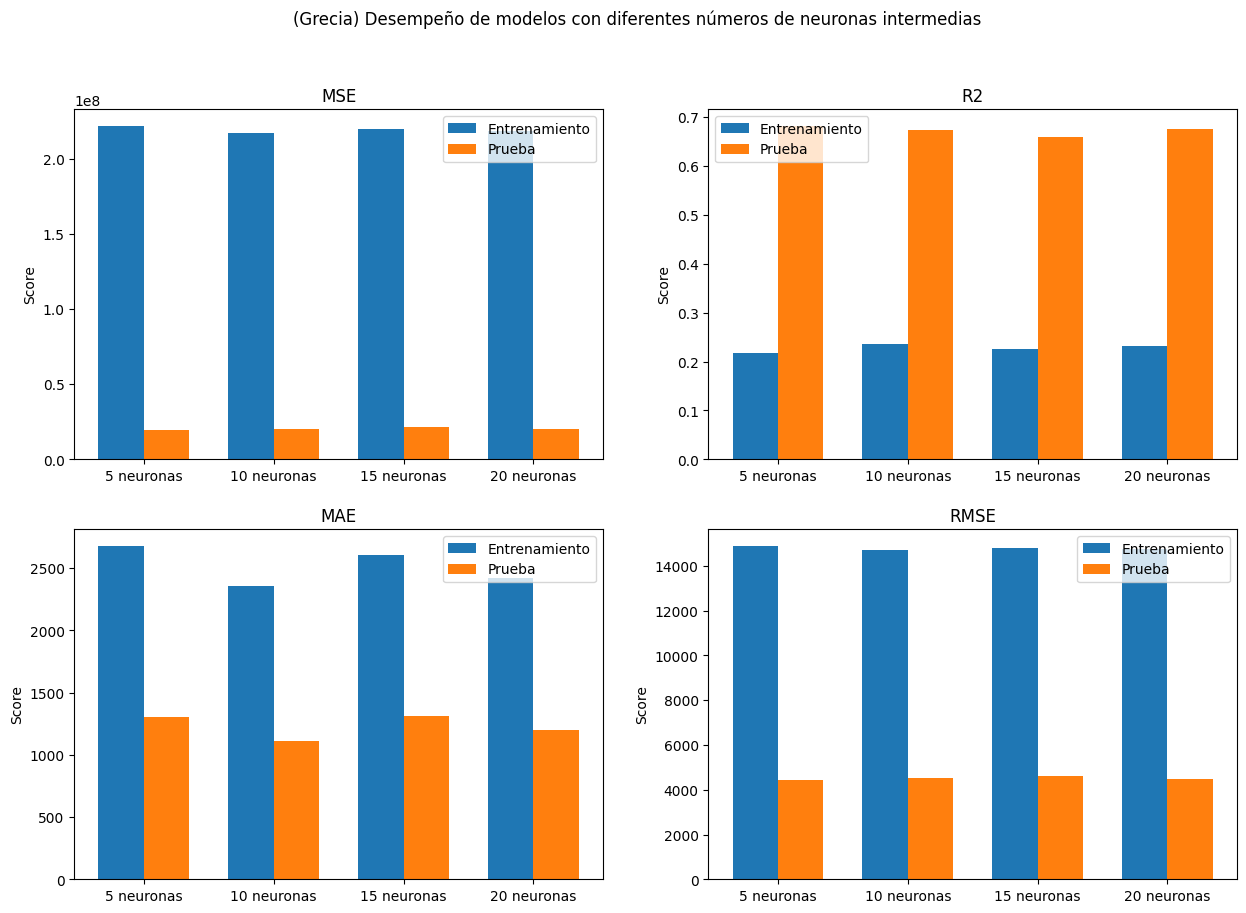

In [29]:
def create_day_columns(date_format):
    def inner(date):
        day_columns = [0] * 7
        weekday = datetime.datetime.strptime(date, date_format).weekday()
        day_columns[weekday] = 1
        return day_columns
    return inner

def create_dataset_Days(data, window_size, day_column_func):
    X, y = [], []
    data_values = data.values.flatten()
    data_index = data.index
    for i in range(len(data_values) - window_size):
        week_data = data_values[i:(i + window_size)]
        day_columns = day_column_func(data_index[i + window_size - 1])
        X.append(np.concatenate((week_data, day_columns)))
        y.append(data_values[i + window_size])
    return np.array(X), np.array(y)

# Uso de las funciones
window_size=8 #predicción a 8 días
Greece_data = data.loc[data["Country/Region"] == "Greece"].iloc[:, 43:].T
daily_cases = Greece_data.diff().dropna()
day_column_func = create_day_columns("%m/%d/%y")
X, y = create_dataset_Days(daily_cases, window_size, day_column_func)

# Dividir la muestra en entrenamiento y test (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar los modelos con diferentes números de neuronas intermedias
hidden_layer_sizes = [5, 10, 15, 20]

models, mse_train_values, mse_test_values, r2_train_values, r2_test_values, mae_train_values, mae_test_values, rmse_train_values, rmse_test_values = train_and_evaluate_models(hidden_layer_sizes, X_train, y_train, X_test, y_test)

# Crear listas de etiquetas para los modelos
model_labels = ['5 neuronas', '10 neuronas', '15 neuronas', '20 neuronas']

# Crear un gráfico de barras para cada métrica
width = 0.35
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Barra de MSE
axs[0, 0].bar(np.arange(len(model_labels)) - width/2, mse_train_values, width, label='Entrenamiento')
axs[0, 0].bar(np.arange(len(model_labels)) + width/2, mse_test_values, width, label='Prueba')
axs[0, 0].set_title('MSE')

# Barra de R2
axs[0, 1].bar(np.arange(len(model_labels)) - width/2, r2_train_values, width, label='Entrenamiento')
axs[0, 1].bar(np.arange(len(model_labels)) + width/2, r2_test_values, width, label='Prueba')
axs[0, 1].set_title('R2')

# Barra de MAE
axs[1, 0].bar(np.arange(len(model_labels)) - width/2, mae_train_values, width, label='Entrenamiento')
axs[1, 0].bar(np.arange(len(model_labels)) + width/2, mae_test_values, width, label='Prueba')
axs[1, 0].set_title('MAE')

# Barra de RMSE
axs[1, 1].bar(np.arange(len(model_labels)) - width/2, rmse_train_values, width, label='Entrenamiento')
axs[1, 1].bar(np.arange(len(model_labels)) + width/2, rmse_test_values, width, label='Prueba')
axs[1, 1].set_title('RMSE')

for ax in axs.flat:
    ax.set(ylabel='Score')
    ax.set_xticks(np.arange(len(model_labels)))
    ax.set_xticklabels(model_labels)
    ax.legend()

fig.suptitle('(Grecia) Desempeño de modelos con diferentes números de neuronas intermedias')
plt.show()

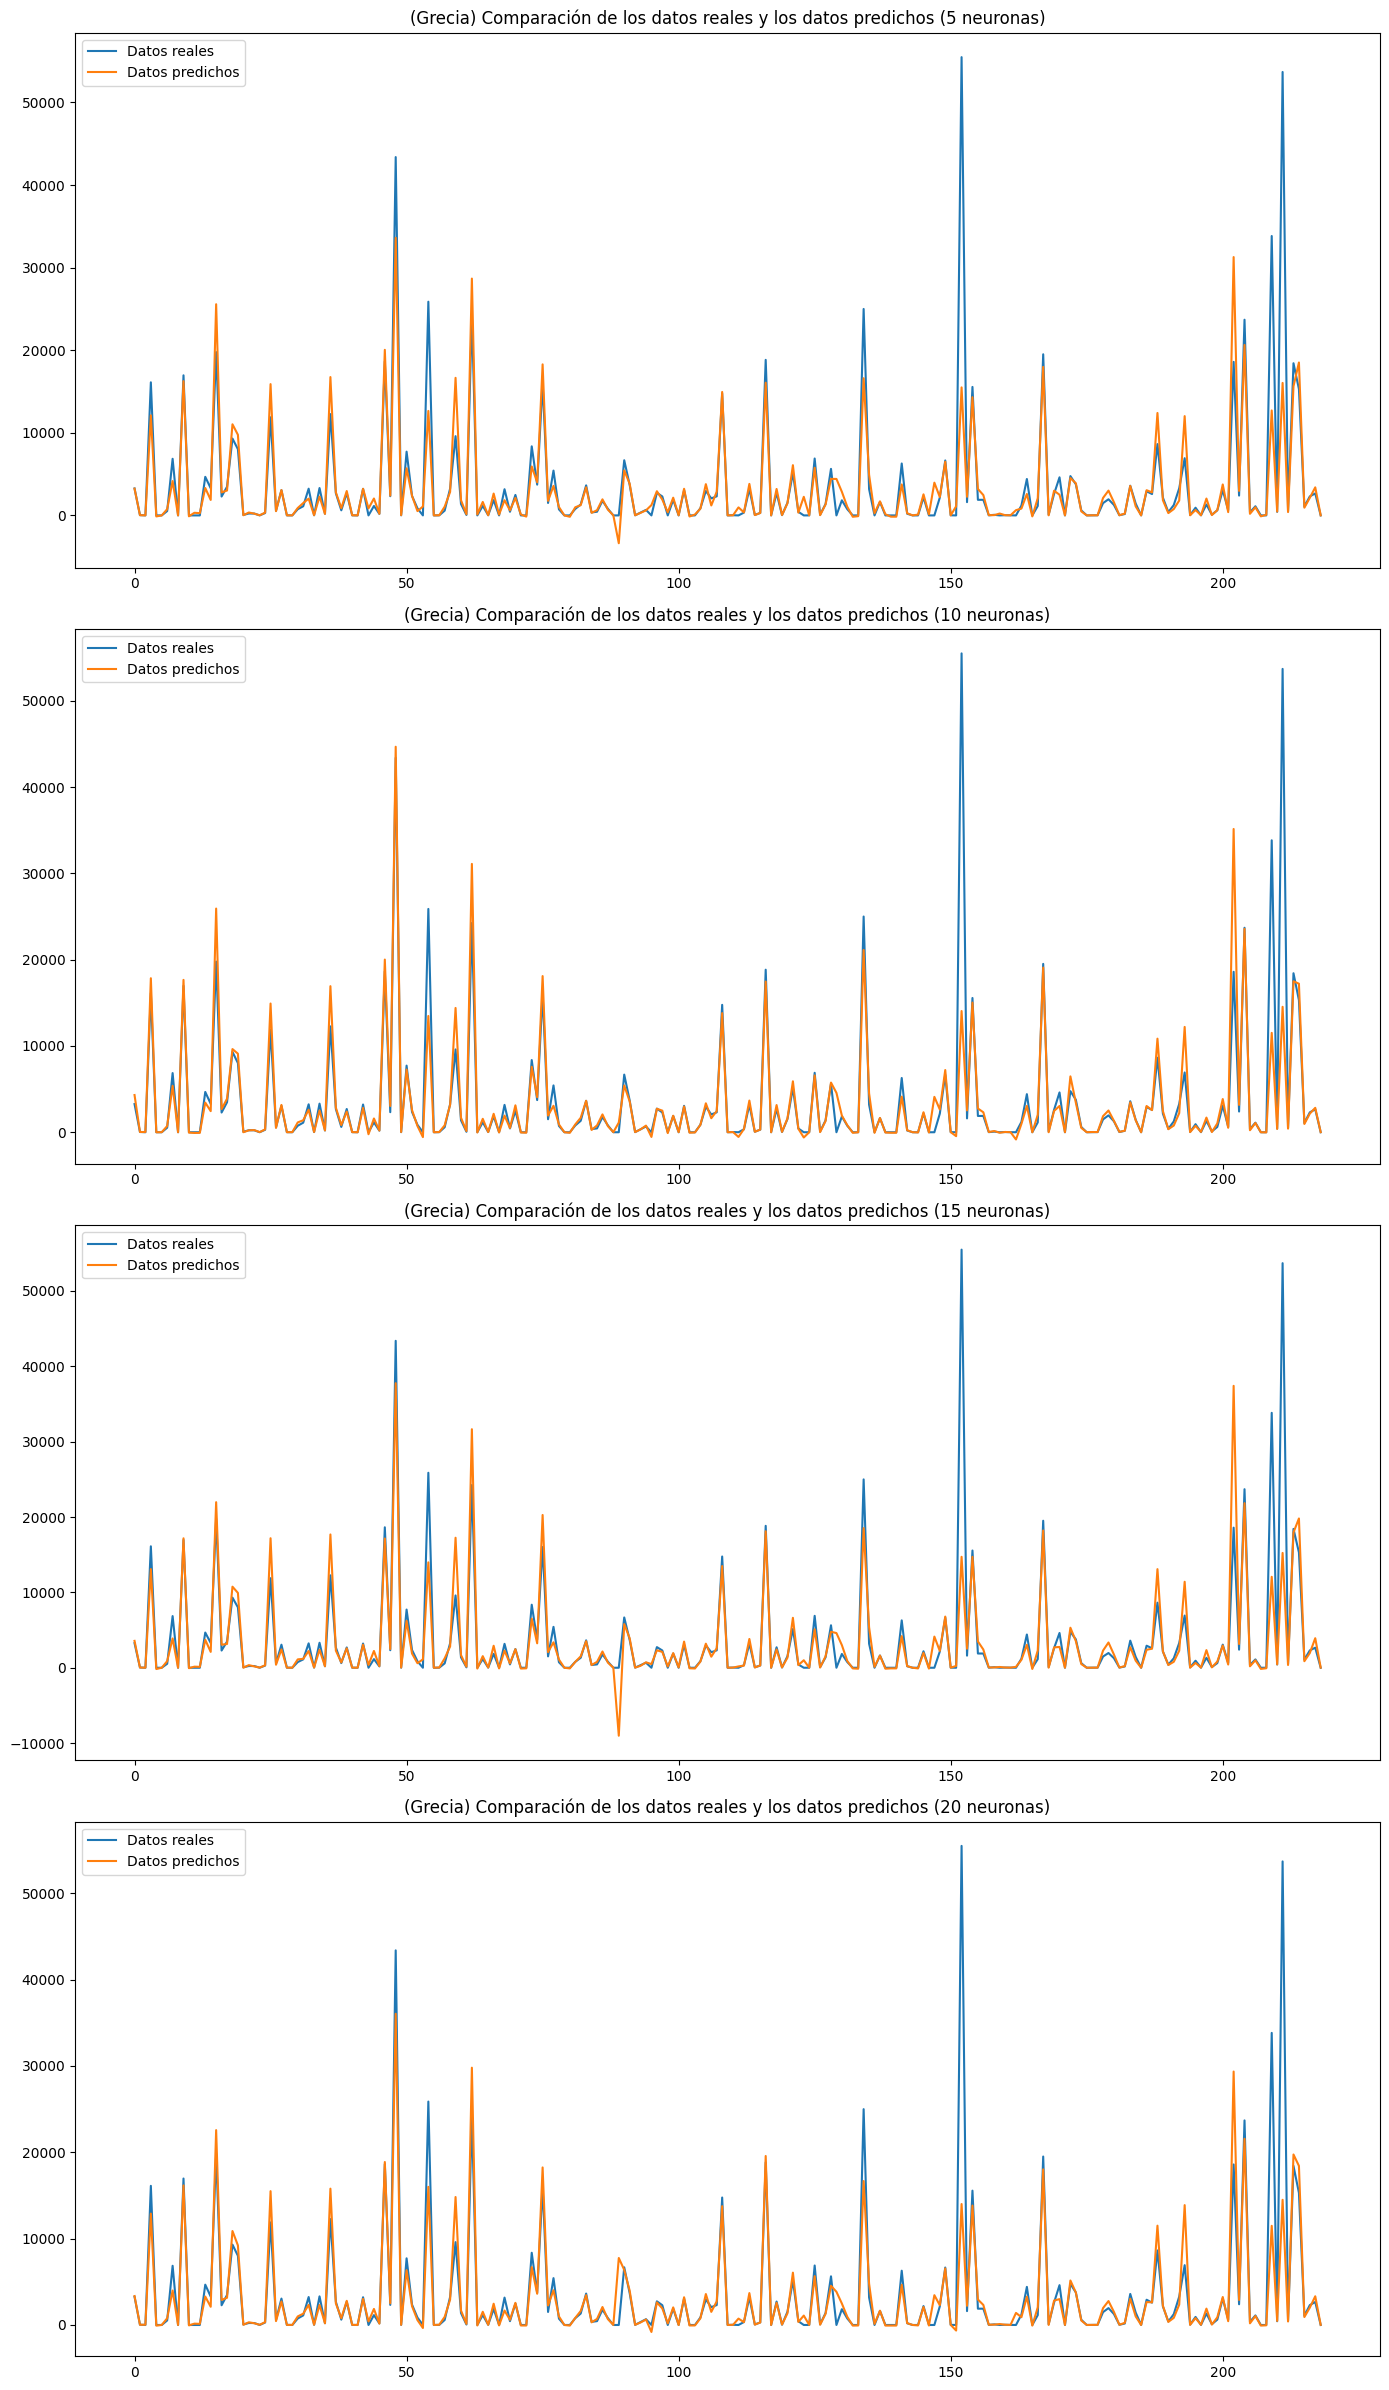

In [30]:
# Crear un gráfico de línea para los datos reales y predichos
fig, axs = plt.subplots(4, 1, figsize=(14, 24))
for i, model in enumerate(models):
    y_test_pred = model.predict(X_test)
    axs[i].plot(range(len(y_test)), y_test, label='Datos reales')
    axs[i].plot(range(len(y_test_pred)), y_test_pred, label='Datos predichos')
    axs[i].set_title('(Grecia) Comparación de los datos reales y los datos predichos (' + model_labels[i] + ')')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Datos de Bélgica


1.  **Realice un análisis estadístico previo sobre los conjuntos de entrenamiento y
test. Dicho análisis debe mostrar, entre otros aspectos que el alumno considere,el número de observaciones, la media, el rango, sesgo, etc. Adicionalmente el
alumno puede emplear alguna gráfica (por ejemplo un histograma) que ilustre
la naturaleza de los datos. Sobre dicho análisis deberá argumentar si el conjunto de entrenamiento y test son similares y cuáles son las características más relevantes de los datos.**

Estadísticas de los conjuntos de entrenamiento y test:
   count         mean           std  min  25%    50%     75%       max Dataset
0  913.0  4333.184009  10299.456756  0.0  0.0  857.0  3430.0  133480.0   Train
1  229.0  3419.947598   6921.965001  0.0  0.0  528.0  3374.0   47493.0    Test

Sesgo del conjunto de entrenamiento: 5.523756848867932
Sesgo del conjunto de test: 3.4897285277023324



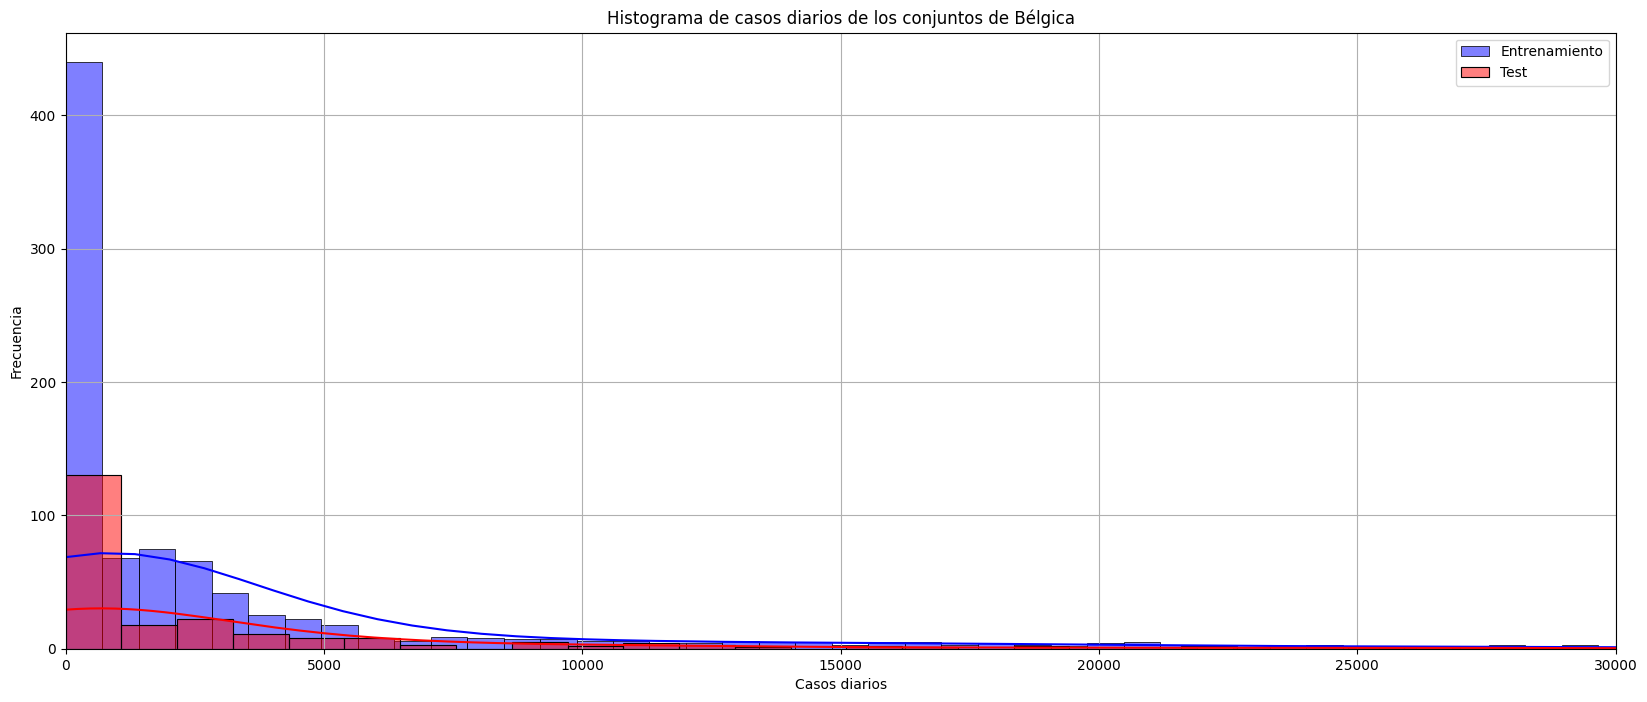

In [31]:
Greece_data = data.loc[data["Country/Region"] == "Belgium"].iloc[:, 4:].T
daily_cases = Greece_data.diff().dropna()
# Dividir la muestra en entrenamiento y test (80% y 20%)
train_data, test_data = train_test_split(daily_cases, test_size=0.2, random_state=45)

# Análisis estadístico previo
train_stats = train_data.describe().T
train_stats["Dataset"] = "Train"
test_stats = test_data.describe().T
test_stats["Dataset"] = "Test"
stats = pd.concat([train_stats, test_stats], axis=0).reset_index(drop=True)

print("Estadísticas de los conjuntos de entrenamiento y test:")
print(stats)

# Calcular el sesgo
train_skew = skew(train_data)[0]
test_skew = skew(test_data)[0]
print(f"\nSesgo del conjunto de entrenamiento: {train_skew}")
print(f"Sesgo del conjunto de test: {test_skew}\n")

# Visualización de histogramas
plt.figure(figsize=(20, 8))
sns.histplot(train_data.iloc[:, 0], kde=True, color="blue", label="Entrenamiento")
sns.histplot(test_data.iloc[:, 0], kde=True, color="red", label="Test", alpha=0.5)
plt.xlabel("Casos diarios")
plt.ylabel("Frecuencia")
plt.title("Histograma de casos diarios de los conjuntos de Bélgica")
plt.legend()
plt.xlim([0,30000])
plt.grid(True)
plt.show()



> **Número de observaciones:** El conjunto de entrenamiento tiene 913 observaciones, mientras que el conjunto de test tiene 229. La división entre los conjuntos de entrenamiento y test es aproximadamente 80/20, lo cual es bastante común en la práctica y permite una evaluación adecuada del rendimiento del modelo.

>**Media:** La media del conjunto de entrenamiento es de aproximadamente 4333,18, mientras que la media del conjunto de test es de aproximadamente 3419,95. Esto indica que el conjunto de entrenamiento tiene un promedio de casos diarios más alto en comparación con el conjunto de test.

> **Desviación estándar:** La desviación estándar del conjunto de entrenamiento es de aproximadamente 10299,46, y la del conjunto de test es de aproximadamente 6921,97. Esto sugiere que hay una mayor variabilidad en el número de casos diarios en el conjunto de entrenamiento en comparación con el conjunto de test.

> **Sesgo:** El sesgo del conjunto de entrenamiento es de aproximadamente 5,52 y el sesgo del conjunto de test es de aproximadamente 3,49. Estos valores indican que la distribución de los casos diarios en ambos conjuntos es asimétrica y está sesgada hacia la derecha, lo que sugiere que hay una mayor probabilidad de observar valores más altos en el conjunto de entrenamiento que en el conjunto de test. La diferencia en el sesgo también puede afectar la capacidad del modelo para generalizar con precisión a los datos de test.












2.  **Cree una red alimentada hacia adelante con UNA sola capa oculta empleando,
por defecto, la misma configuración que la práctica no entregable explicada en
clase y con 5, 10, 15 y 20 neuronas intermedias. Para cada uno de estos modelos
explique si hay sesgo, varianza, sobreajuste…y haga una valoración de dichos
resultados.**

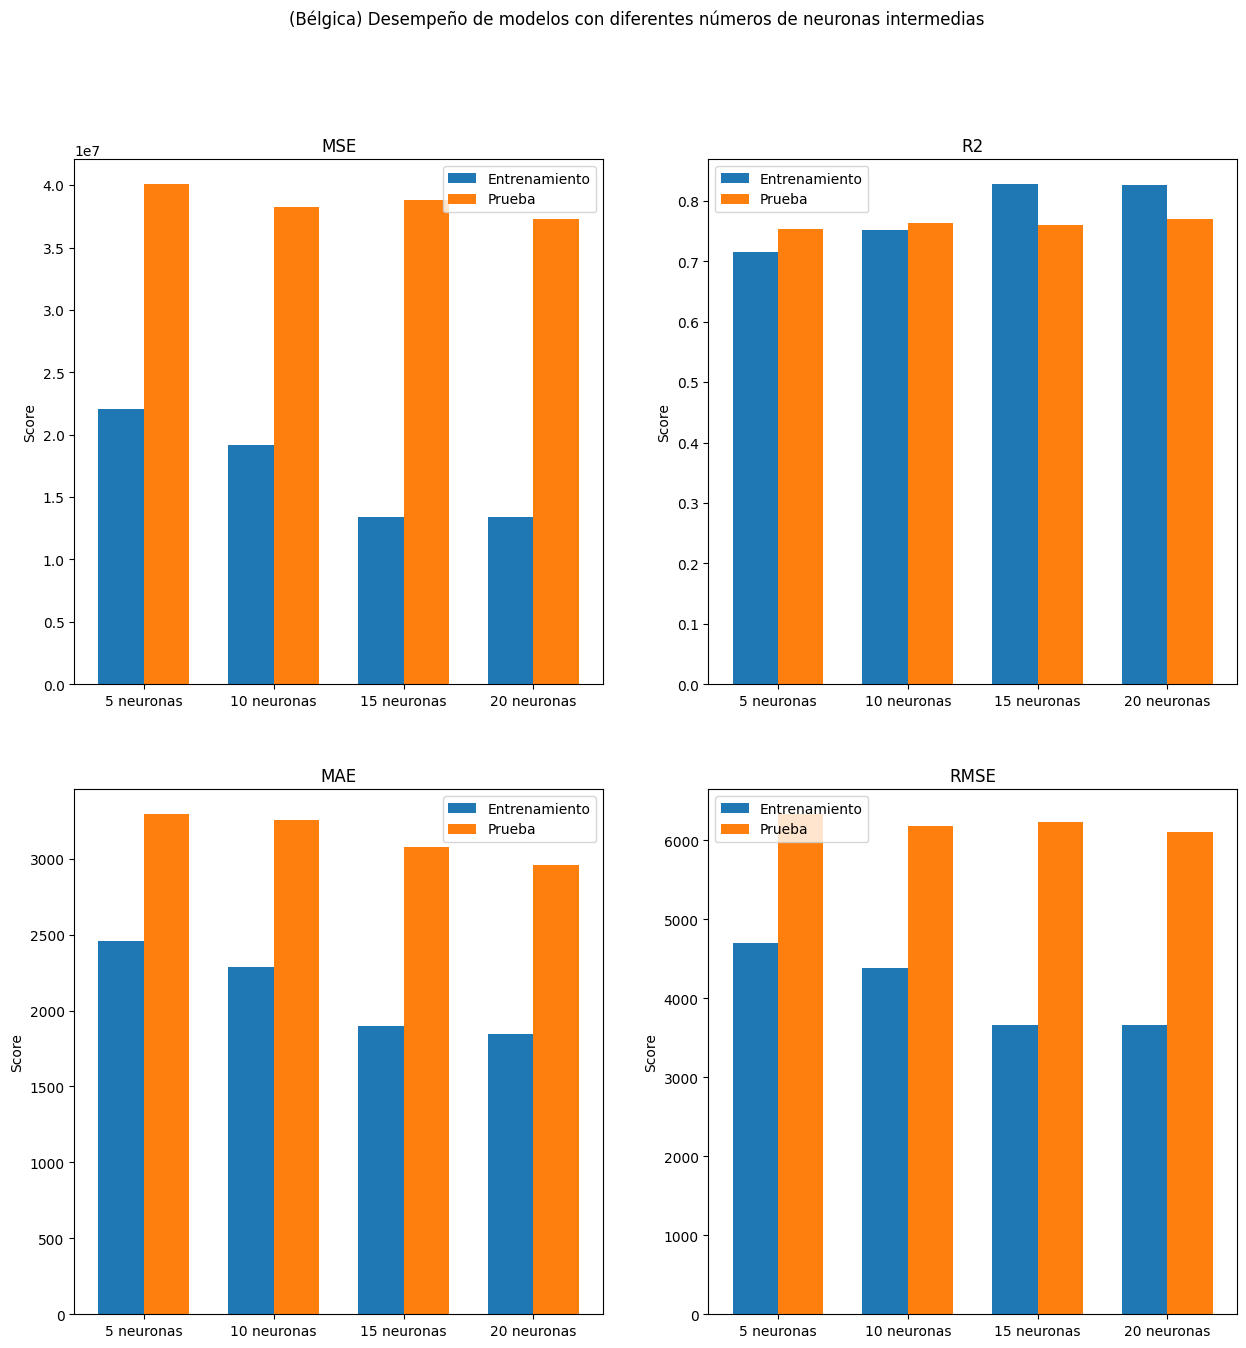

In [26]:
# Inicialización de variables
window_size = 5 #predicción a 5 días
X, y = create_dataset(daily_cases, window_size)
hidden_layer_sizes = [5, 10, 15, 20]
# Dividir la muestra en entrenamiento y test (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)
models, mse_train_values, mse_test_values, r2_train_values, r2_test_values, mae_train_values, mae_test_values, rmse_train_values, rmse_test_values = train_and_evaluate_models(hidden_layer_sizes, X_train, y_train, X_test, y_test)

# Crear listas de etiquetas para los modelos
model_labels = ['5 neuronas', '10 neuronas', '15 neuronas', '20 neuronas']

# Crear un gráfico de barras para cada métrica
width = 0.35
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Barra de MSE
axs[0, 0].bar(np.arange(len(model_labels)) - width/2, mse_train_values, width, label='Entrenamiento')
axs[0, 0].bar(np.arange(len(model_labels)) + width/2, mse_test_values, width, label='Prueba')
axs[0, 0].set_title('MSE')

# Barra de R2
axs[0, 1].bar(np.arange(len(model_labels)) - width/2, r2_train_values, width, label='Entrenamiento')
axs[0, 1].bar(np.arange(len(model_labels)) + width/2, r2_test_values, width, label='Prueba')
axs[0, 1].set_title('R2')

# Barra de MAE
axs[1, 0].bar(np.arange(len(model_labels)) - width/2, mae_train_values, width, label='Entrenamiento')
axs[1, 0].bar(np.arange(len(model_labels)) + width/2, mae_test_values, width, label='Prueba')
axs[1, 0].set_title('MAE')

# Barra de RMSE
axs[1, 1].bar(np.arange(len(model_labels)) - width/2, rmse_train_values, width, label='Entrenamiento')
axs[1, 1].bar(np.arange(len(model_labels)) + width/2, rmse_test_values, width, label='Prueba')
axs[1, 1].set_title('RMSE')

for i in range(2):
    for j in range(2):
        axs[i, j].set(ylabel='Score')
        axs[i, j].set_xticks(np.arange(len(model_labels)))
        axs[i, j].set_xticklabels(model_labels)
        axs[i, j].legend()

fig.suptitle('(Bélgica) Desempeño de modelos con diferentes números de neuronas intermedias')
plt.show()

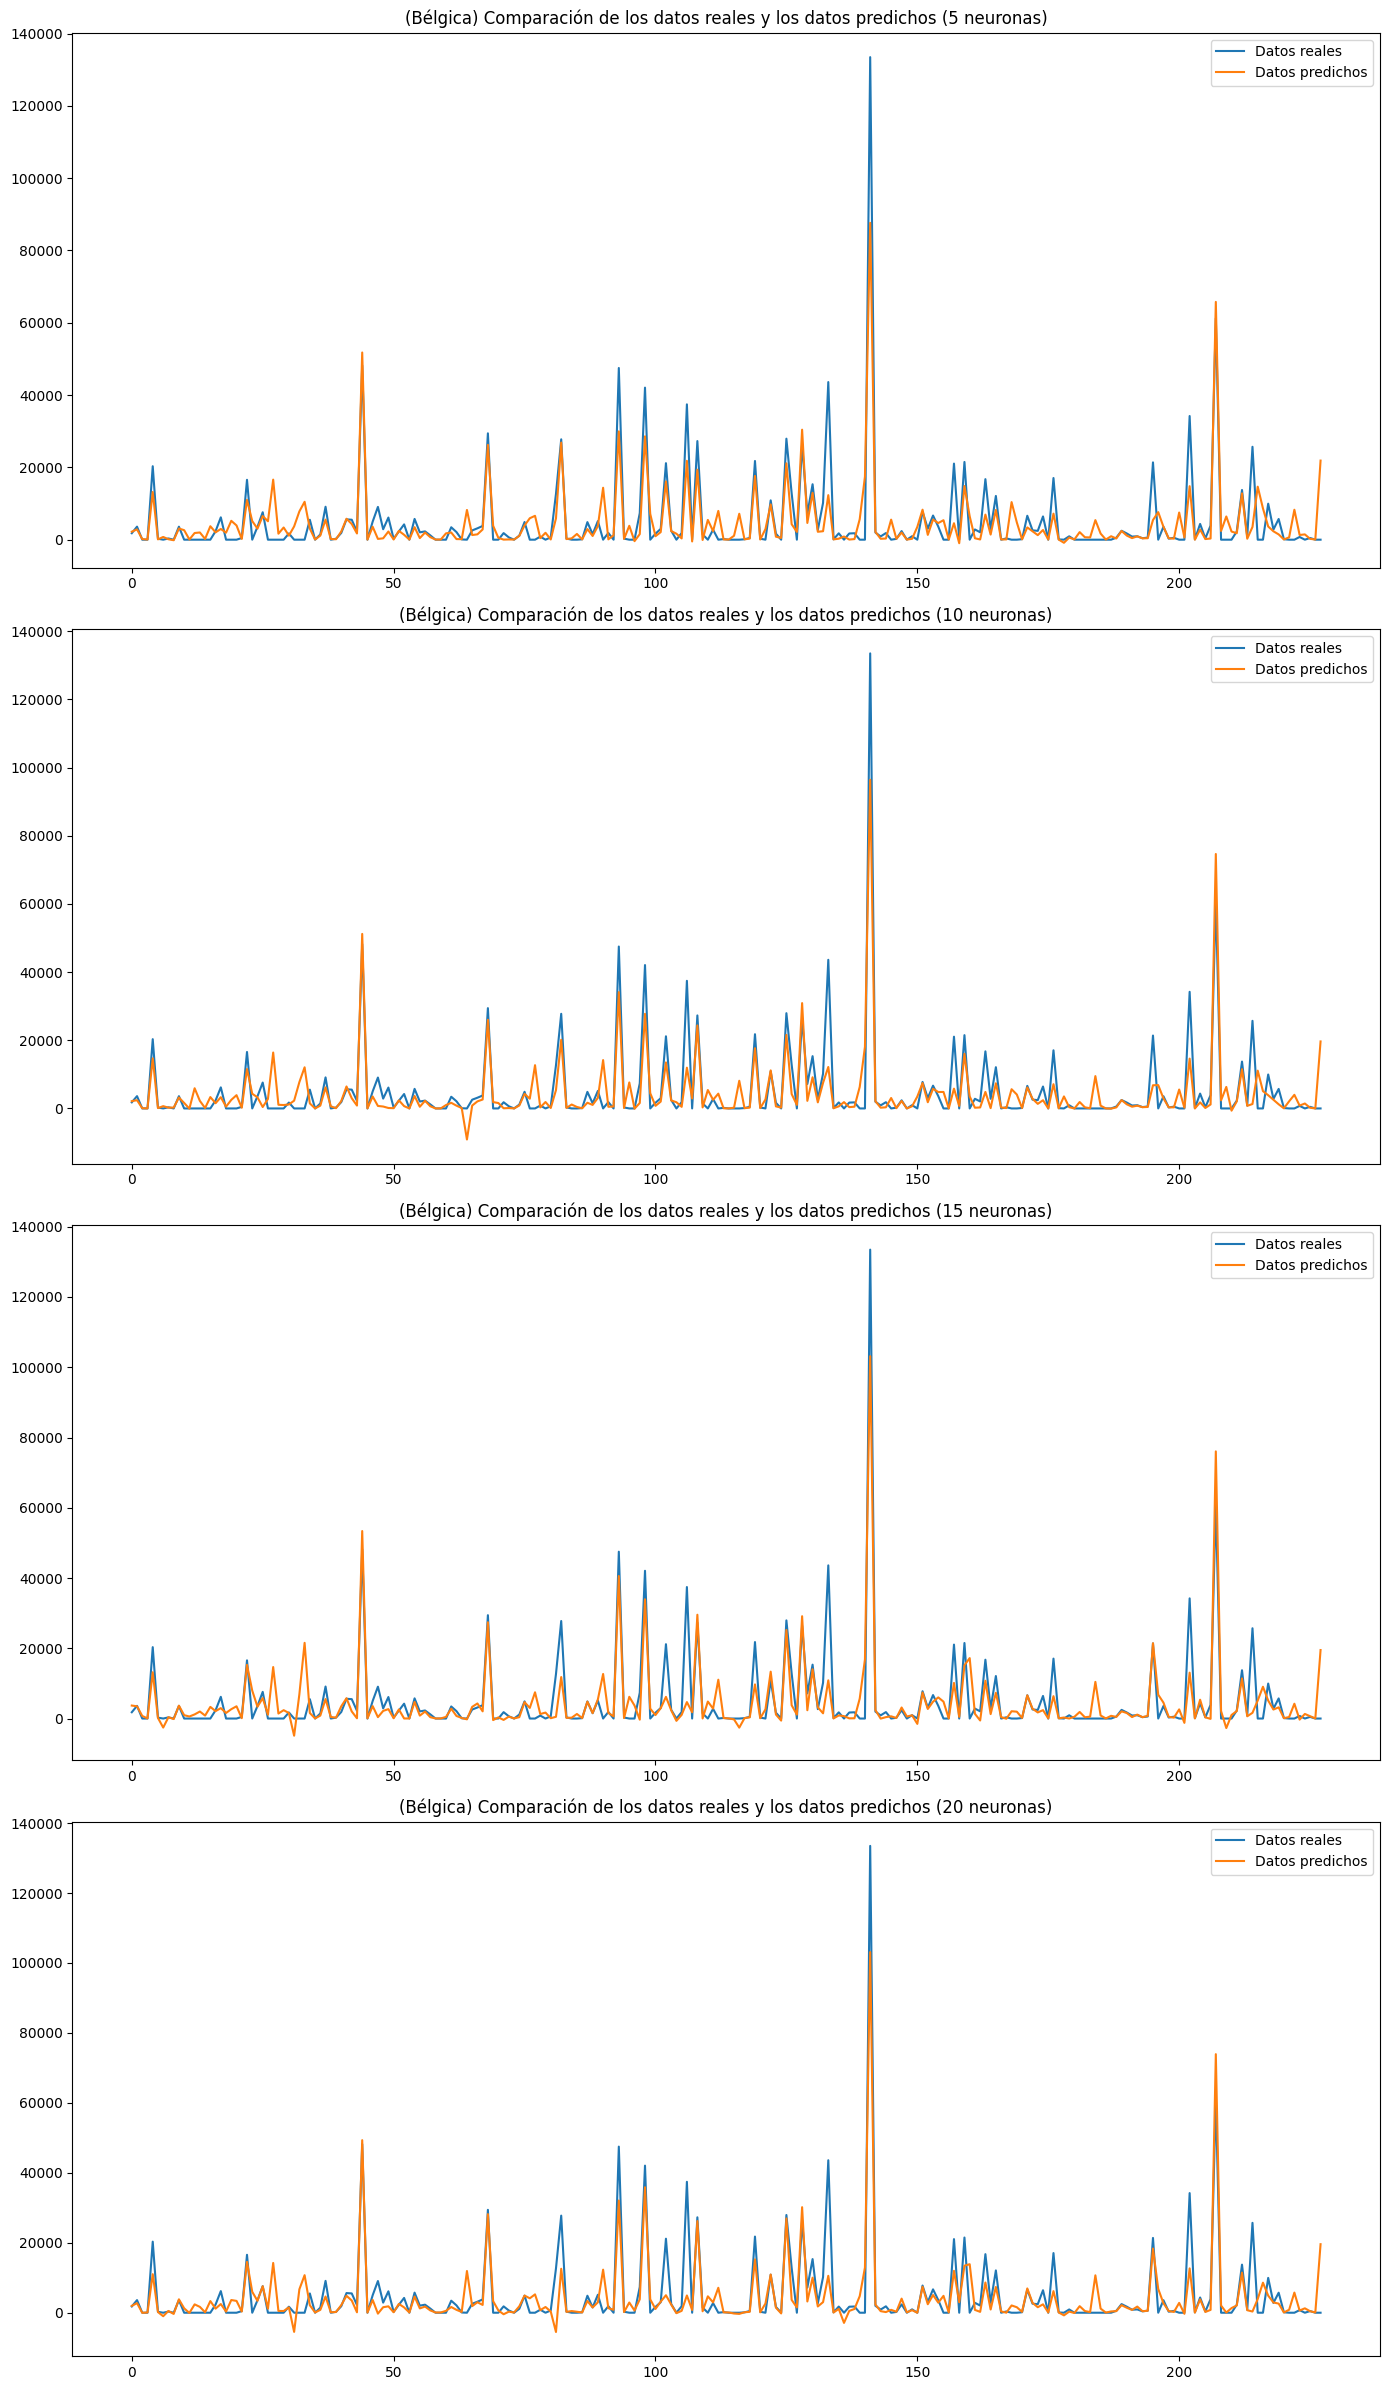

In [27]:
# Crear un gráfico de línea para los datos reales y predichos
fig, axs = plt.subplots(4, 1, figsize=(14, 24))
for i, model in enumerate(models):
    y_test_pred = model.predict(X_test)
    axs[i].plot(range(len(y_test)), y_test, label='Datos reales')
    axs[i].plot(range(len(y_test_pred)), y_test_pred, label='Datos predichos')
    axs[i].set_title('(Bélgica) Comparación de los datos reales y los datos predichos (' + model_labels[i] + ')')
    axs[i].legend()

plt.tight_layout()
plt.show()

3. **Considere ahora una RNA con una o DOS capas. Determine, mediante algún
procedimiento, la estructura óptima (manteniendo un mínimo de 5 y un
máximo de 20 neuronas en cada capa) de la red explicando por qué considera
que dicha estructura es óptima. Puede investigar sobre distintos hiperparámetros
como el momento, la tasa de aprendizaje o el algoritmo de
optimización para determinar dicha estructura. Es importante que en esta
comparación, así como en la siguiente, argumente las medidas de error
consideradas.** 

In [13]:
# Crea el objeto MinMaxScaler
scaler = MinMaxScaler()  # Por defecto, MinMaxScaler escala los datos a [0, 1]
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  
# Definir los rangos de hiperparámetros y número de neuronas por capa
hidden_layer_sizes = [(i,) for i in range(5, 21)] + [(i, j) for i in range(5, 21) for j in range(5, 21)]
param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'momentum': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Configurar y ejecutar la búsqueda en cuadrícula aleatoria
mlp = MLPRegressor(max_iter=1000,random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # Utilizar MSE como medida de error
random_search = RandomizedSearchCV(mlp, param_grid, n_iter=50, scoring=mse_scorer, cv=5, n_jobs=-1, verbose=1,random_state=40)
random_search.fit(X_train_scaled, y_train.ravel())

# Mostrar los resultados
print(f"Mejores hiperparámetros encontrados: {random_search.best_params_}")
print(f"Mejor MSE de entrenamiento: {-random_search.best_score_}")

best_mlp = random_search.best_estimator_
y_test_pred = best_mlp.predict(X_test_scaled)
mse_mlp = mean_squared_error(y_test, y_test_pred)
r2_mlp = r2_score(y_test, y_test_pred)

print(f"Mejor modelo:")
print(f"  MSE de prueba: {mse_mlp:.5f}")
print(f"  R2 de prueba: {r2_mlp:.5f}\n")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros encontrados: {'solver': 'lbfgs', 'momentum': 0.9, 'learning_rate': 'constant', 'hidden_layer_sizes': (20, 5)}
Mejor MSE de entrenamiento: 32824198.0013073
Mejor modelo:
  MSE de prueba: 68189870.72634
  R2 de prueba: 0.31830



4. **Compare los resultados del modelo óptimo obtenido con alguno (uno SOLO) de
los algoritmos vistos en prácticas anteriores. ¿En qué medida el modelo de RNA
es superior o inferior?, motive la respuesta.**

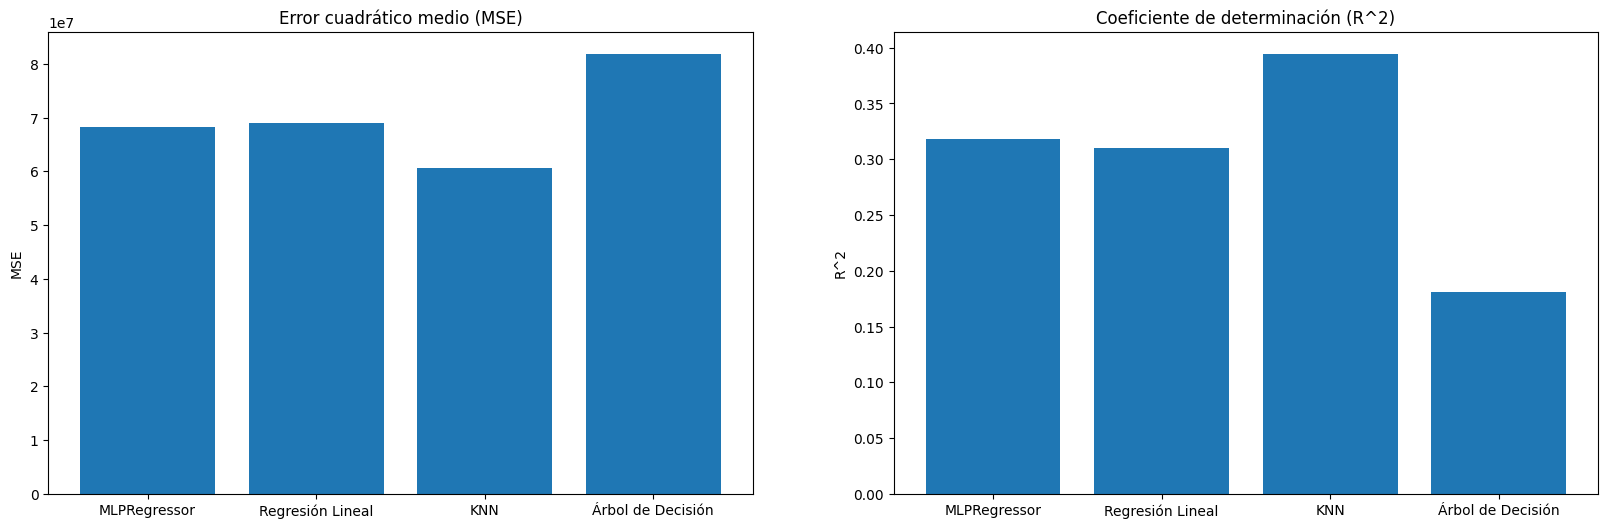

In [14]:
# Entrenar un modelo de Regresión Lineal
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train.ravel())

# Entrenar un modelo KNN
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train.ravel())

# Entrenar un Árbol de Decisión
decision_tree_regressor = DecisionTreeRegressor(random_state=45)
decision_tree_regressor.fit(X_train, y_train.ravel())

# Realizar predicciones en el conjunto de prueba para cada modelo
y_pred_lr = linear_regression.predict(X_test)
y_pred_knn = knn_regressor.predict(X_test)
y_pred_dt = decision_tree_regressor.predict(X_test)

# Calcular el error cuadrático medio (MSE) para cada modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calcular el coeficiente de determinación (R^2) para cada modelo
r2_lr = r2_score(y_test, y_pred_lr)
r2_knn = r2_score(y_test, y_pred_knn)
r2_dt = r2_score(y_test, y_pred_dt)

# Etiquetas de los modelos
model_labels = ['MLPRegressor', 'Regresión Lineal', 'KNN', 'Árbol de Decisión']

# Valores de MSE y R^2 para cada modelo
mse_values = [mse_mlp, mse_lr, mse_knn, mse_dt]
r2_values = [r2_mlp, r2_lr, r2_knn, r2_dt]

# Configurar la figura y los ejes
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# Graficar MSE
ax[0].bar(model_labels, mse_values)
ax[0].set_title('Error cuadrático medio (MSE)')
ax[0].set_ylabel('MSE')

# Graficar R^2
ax[1].bar(model_labels, r2_values)
ax[1].set_title('Coeficiente de determinación (R^2)')
ax[1].set_ylabel('R^2')

# Mostrar la gráfica
plt.show()

5. **Proponga críticas al modelo y posibles extensiones.**

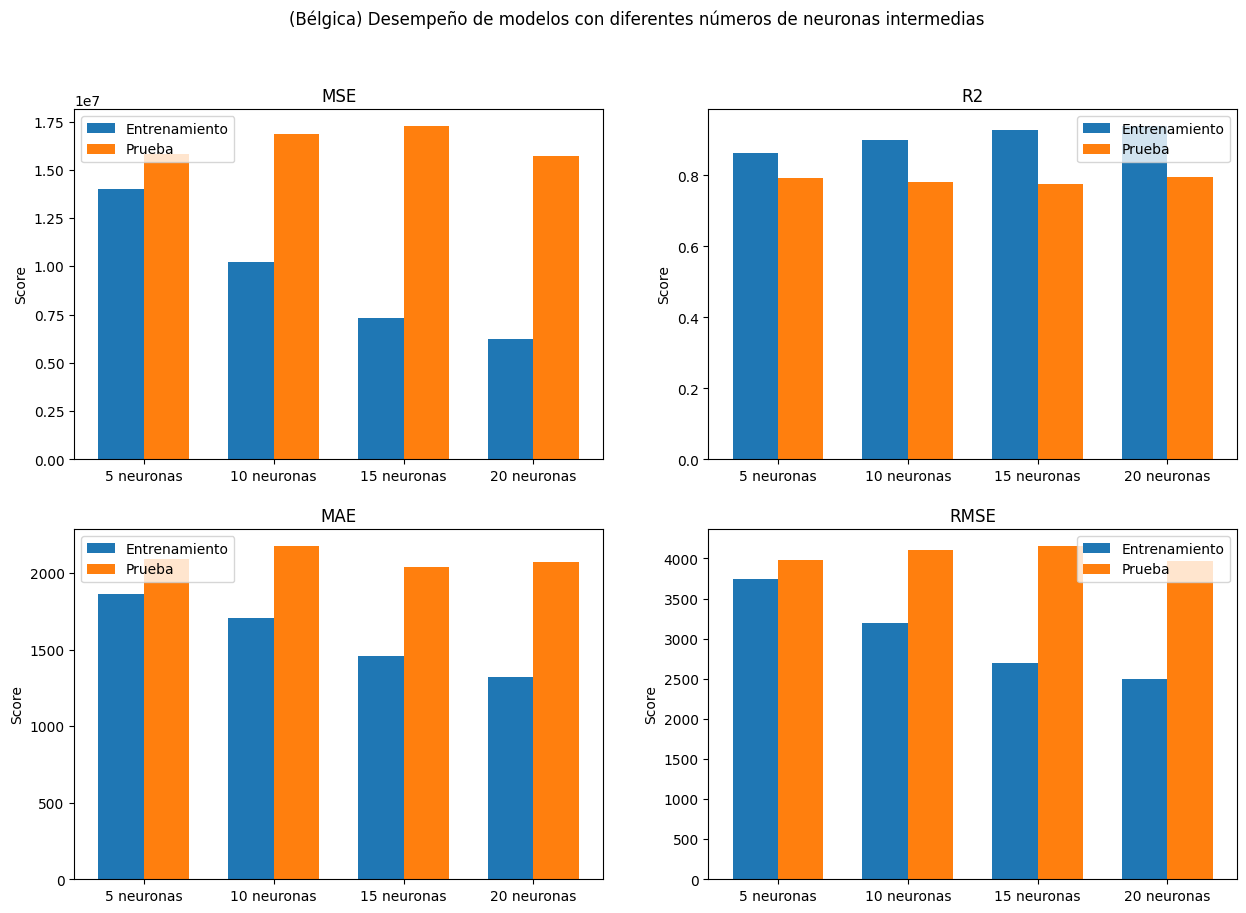

In [45]:
# Uso de las funciones
window_size=10 #prediccion a 10 días
Greece_data = data.loc[data["Country/Region"] == "Belgium"].iloc[:, 43:].T
daily_cases = Greece_data.diff().dropna()
day_column_func = create_day_columns("%m/%d/%y")
X, y = create_dataset_Days(daily_cases, window_size, day_column_func)

# Dividir la muestra en entrenamiento y test (80% y 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=120)

# Crear y entrenar los modelos con diferentes números de neuronas intermedias
hidden_layer_sizes = [5, 10, 15, 20]

models, mse_train_values, mse_test_values, r2_train_values, r2_test_values, mae_train_values, mae_test_values, rmse_train_values, rmse_test_values = train_and_evaluate_models(hidden_layer_sizes, X_train, y_train, X_test, y_test)

# Crear listas de etiquetas para los modelos
model_labels = ['5 neuronas', '10 neuronas', '15 neuronas', '20 neuronas']

# Crear un gráfico de barras para cada métrica
width = 0.35
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Barra de MSE
axs[0, 0].bar(np.arange(len(model_labels)) - width/2, mse_train_values, width, label='Entrenamiento')
axs[0, 0].bar(np.arange(len(model_labels)) + width/2, mse_test_values, width, label='Prueba')
axs[0, 0].set_title('MSE')

# Barra de R2
axs[0, 1].bar(np.arange(len(model_labels)) - width/2, r2_train_values, width, label='Entrenamiento')
axs[0, 1].bar(np.arange(len(model_labels)) + width/2, r2_test_values, width, label='Prueba')
axs[0, 1].set_title('R2')

# Barra de MAE
axs[1, 0].bar(np.arange(len(model_labels)) - width/2, mae_train_values, width, label='Entrenamiento')
axs[1, 0].bar(np.arange(len(model_labels)) + width/2, mae_test_values, width, label='Prueba')
axs[1, 0].set_title('MAE')

# Barra de RMSE
axs[1, 1].bar(np.arange(len(model_labels)) - width/2, rmse_train_values, width, label='Entrenamiento')
axs[1, 1].bar(np.arange(len(model_labels)) + width/2, rmse_test_values, width, label='Prueba')
axs[1, 1].set_title('RMSE')

# Agregar etiquetas de texto, título y personalizar las etiquetas de ticks del eje x, etc.
for ax in axs.flat:
    ax.set(ylabel='Score')
    ax.set_xticks(np.arange(len(model_labels)))
    ax.set_xticklabels(model_labels)
    ax.legend()

fig.suptitle('(Bélgica) Desempeño de modelos con diferentes números de neuronas intermedias')
plt.show()

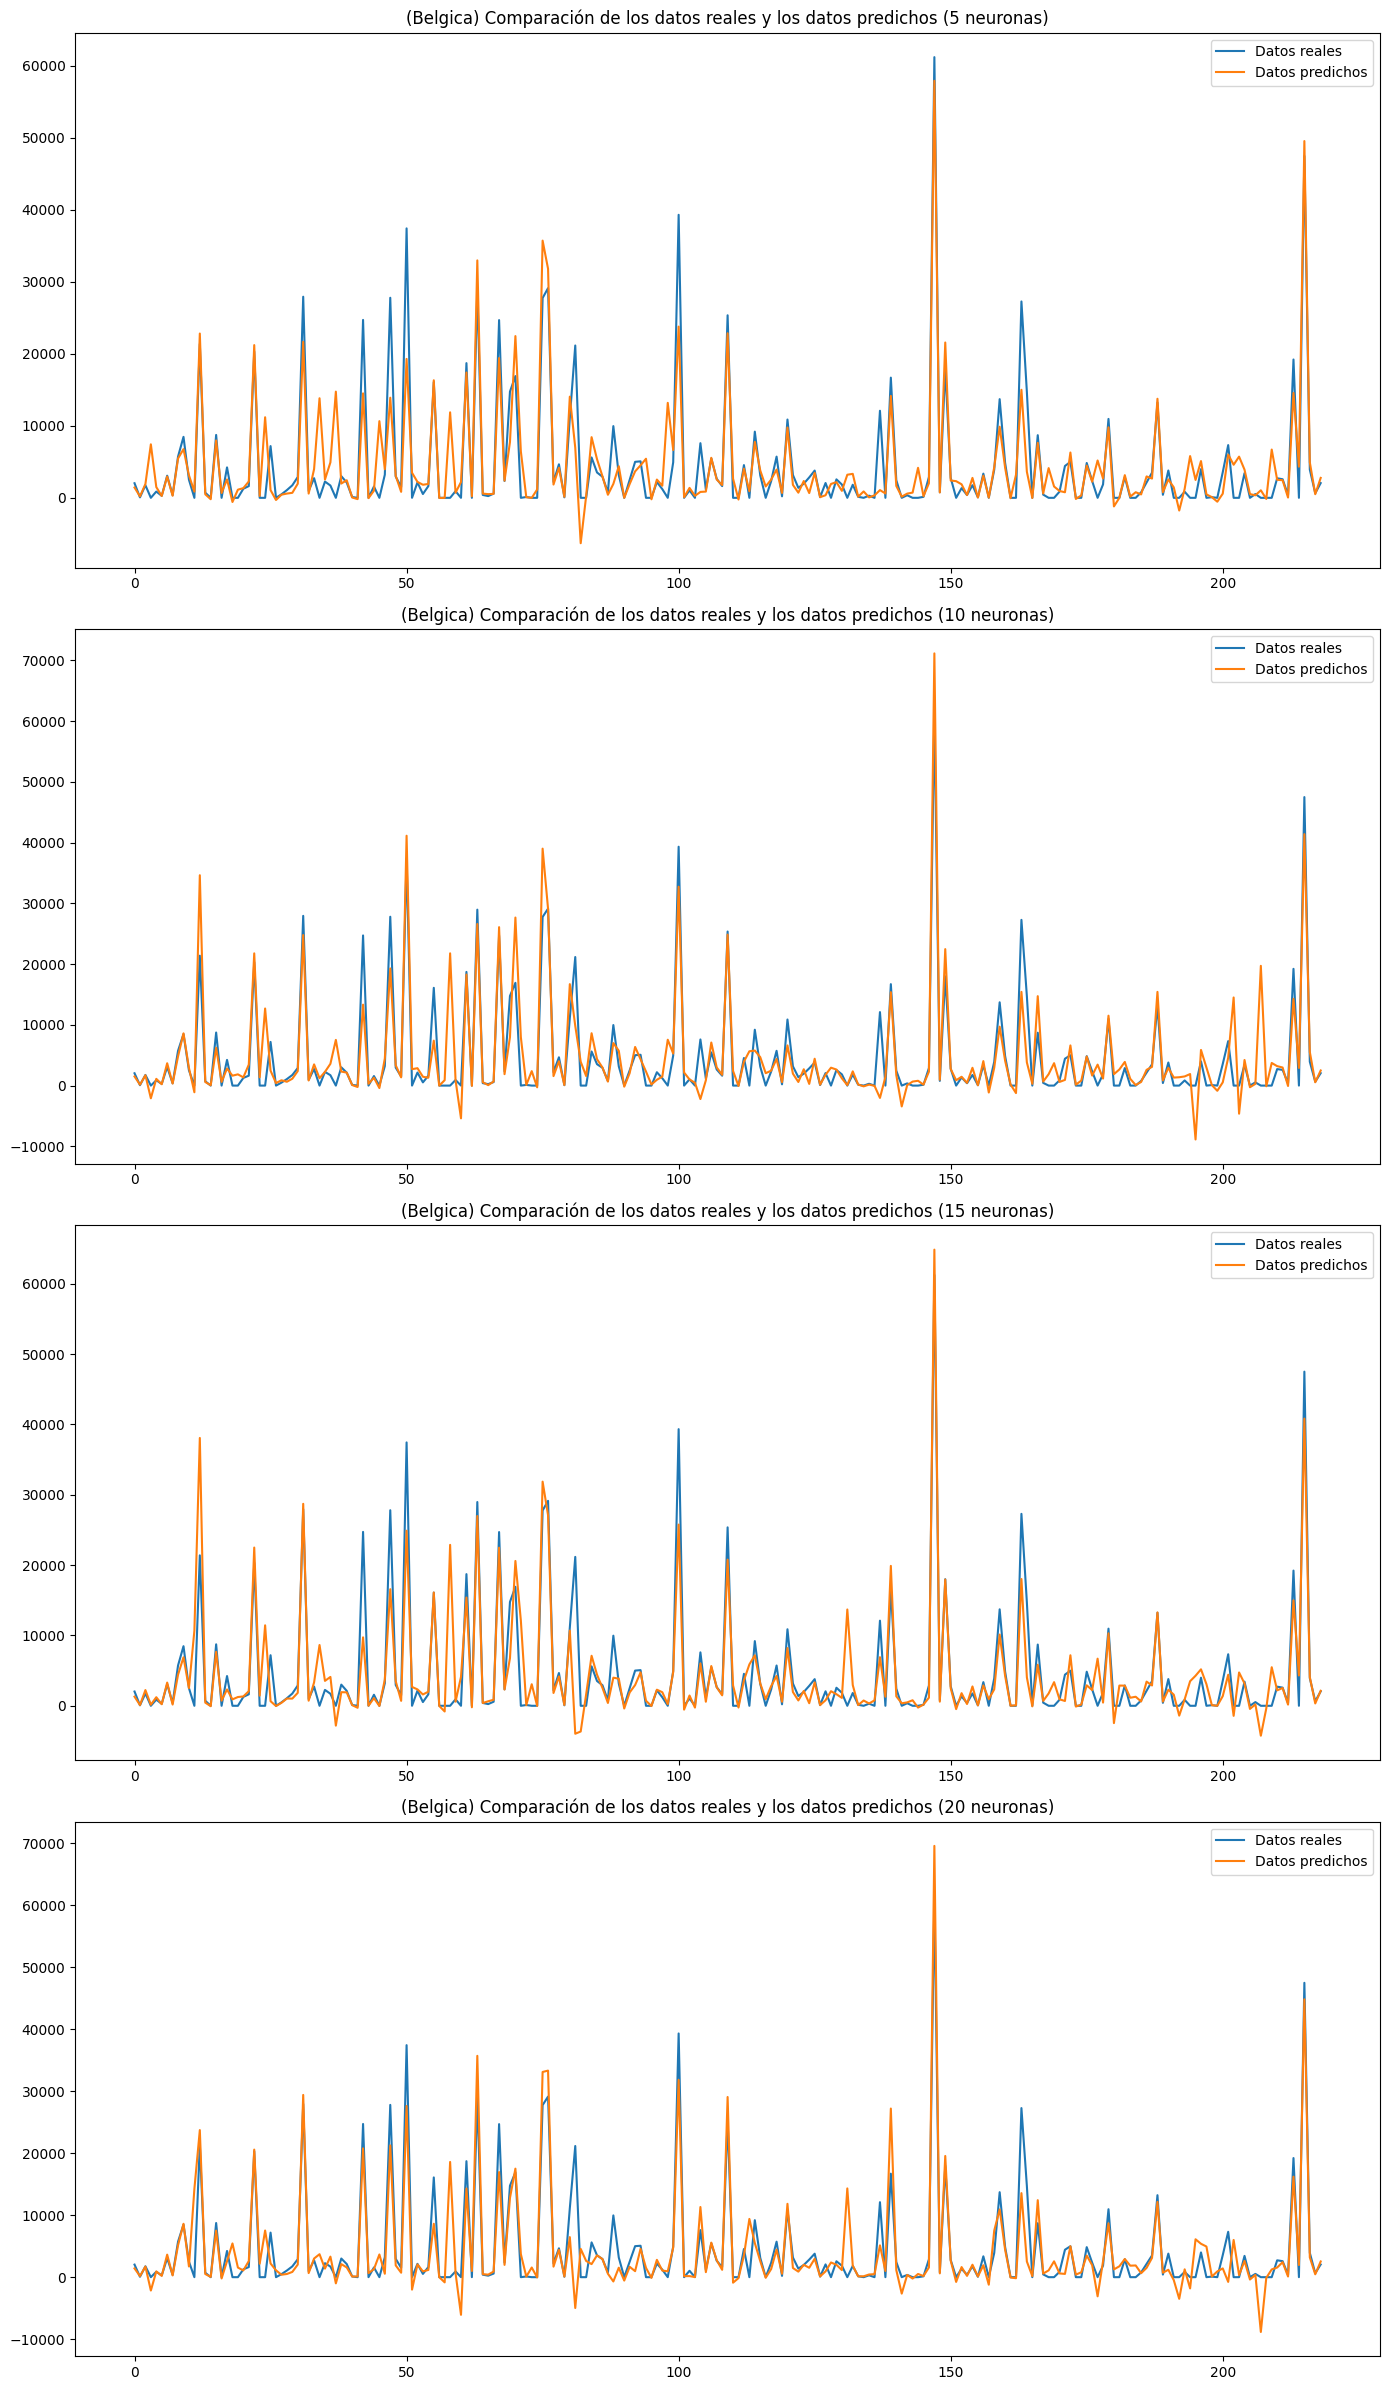

In [46]:
# Crear un gráfico de línea para los datos reales y predichos
# Para cada modelo
fig, axs = plt.subplots(4, 1, figsize=(14, 24))
for i, model in enumerate(models):
    y_test_pred = model.predict(X_test)
    axs[i].plot(range(len(y_test)), y_test, label='Datos reales')
    axs[i].plot(range(len(y_test_pred)), y_test_pred, label='Datos predichos')
    axs[i].set_title('(Belgica) Comparación de los datos reales y los datos predichos (' + model_labels[i] + ')')
    axs[i].legend()

plt.tight_layout()
plt.show()